In [1]:
import sys
import ast
print(sys.executable)
import os
import random
import networkx as nx
from matplotlib import pyplot as plt
import pylab
import re
import torch
import numpy as np
import pandas as pd
# 1.nr 2.nid 3.er 4.eid

C:\Python310\python.exe


In [2]:
DATASET = "IMDB"
ORI_DIR = "./dataset/"+DATASET+"/original"
GEN_DIR ="./dataset/"+DATASET+"/generated"
TEST_DIR = "./dataset/"+DATASET+"/test"
TEST_GEN_DIR = "./dataset/"+DATASET+"/test_gen"
DATASET_FOLDER = "./dataset/"+DATASET

In [4]:
g = nx.read_gexf(path="./dataset/AIDS/original/4.gexf")
print(g.nodes['1'])
print(g.edges[('7', '3')])

{'type': 'C', 'label': '1'}
{'valence': 2, 'id': '6'}


In [5]:
g = nx.read_gexf(path=ORI_DIR+"/1.gexf")
print(g.nodes['1'])
print(g.edges[('7','5')])

{'label': '1'}
{'id': '29'}


In [6]:
g = nx.read_gexf(path="./dataset/IMDB/original/4.gexf")
print(g.nodes['1'])
print(g.edges[('1', '7')])

{'label': '1'}
{'id': '7'}


In [4]:


def getTypeInfo():

    filenames = os.listdir(ORI_DIR)
    Node_Types = []
    Edge_Types = []
    for filename in filenames:
        if filename.endswith(".gexf"):
            #print(filename)
            temp = nx.read_gexf(path=ORI_DIR+ "\\" + filename)
            for node in temp.nodes:
                if DATASET == "AIDS":
                    temp_type = temp.nodes[node]['type']
                else:
                    temp_type = temp.nodes[node]['label']
                if temp_type not in Node_Types:
                    Node_Types.append(temp_type)
            for edge in temp.edges:
                if DATASET == "AIDS":
                    temp_type = temp.edges[edge]['valence']
                else:
                    temp_type = temp.edges[edge]['id']
                if temp_type not in Edge_Types:
                    Edge_Types.append(temp_type)
    return Node_Types, Edge_Types
Node_Types, Edge_Types = getTypeInfo()
print(Node_Types)
print(Edge_Types)

['5', '0', '1', '2', '3', '6', '4', '7', '11', '10', '12', '9', '8', '28', '17', '29', '32', '31', '13', '24', '18', '19', '30', '27', '21', '22', '20', '25', '14', '15', '16', '33', '23', '26', '42', '35', '37', '40', '36', '38', '34', '41', '39', '43', '52', '47', '49', '46', '51', '45', '44', '53', '48', '50', '55', '56', '72', '61', '69', '71', '68', '73', '66', '67', '62', '74', '58', '57', '76', '75', '77', '60', '64', '65', '63', '59', '70', '54', '82', '84', '79', '86', '83', '87', '78', '81', '85', '80', '88']
['4', '9', '13', '16', '20', '18', '0', '1', '2', '5', '3', '6', '7', '10', '8', '11', '14', '12', '17', '15', '19', '29', '36', '37', '35', '23', '31', '32', '30', '21', '40', '39', '27', '33', '41', '26', '34', '28', '38', '25', '22', '24', '285', '101', '292', '244', '257', '187', '148', '231', '272', '220', '126', '121', '80', '124', '125', '123', '120', '128', '127', '122', '69', '90', '102', '105', '50', '104', '86', '97', '82', '98', '85', '92', '103', '100', '94'

In [3]:
ATTR_NAMES = {
    "IMDB": {
        "node": "label",
        "edge": "id",
        "node2": "label",
        "edge2": "id",
    },
    "LINUX": {
        "node": "label",
        "edge": "id",
        "node2": "label",
        "edge2": "id"
    },
    "AIDS": {
        "node": "label",
        "edge": "id",
        "node2": "type",
        "edge2": "valence",
    },
}
print(ATTR_NAMES["AIDS"]["node"])

label


In [4]:
color_set = []
for i in range(0, len(Node_Types)):
    r = lambda: random.randint(0, 255)
    color_set.append('#{:02x}{:02x}{:02x}'.format(r(), r(), r()))


def draw_type(g):
    #    node_color_lst = []
    #    node_type_lst =  []
    #    for node in list(g.nodes()):
    #        temp = g.node[node]['type']
    #        if temp not in node_type_lst:
    #            index = Node_Types.index(temp)
    #            node_color_lst.append(color_set[index])
    #            node_type_lst.append(temp)

    pos = nx.spring_layout(g)
    edge_labels = dict([((n1, n2), d['valence']) for n1, n2, d in g.edges(data=True)])
    node_labels = nx.get_node_attributes(g, 'type')
    print(edge_labels)
    print(node_labels)
    #nx.draw(g, pos, labels=node_labels, edge_labels=edge_labels, node_size=500, node_color=node_color_lst)
    nx.draw(g, pos, labels=node_labels, node_size=500)
    nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)
    pylab.show()


def draw_id(g):
    pos = nx.spring_layout(g)
    edge_labels = dict([((n1, n2), d['valence']) for n1, n2, d in g.edges(data=True)])
    node_labels = nx.get_node_attributes(g, 'label')
    nx.draw(g, pos, labels=node_labels, node_size=500)
    nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)
    pylab.show()


def draw(g):
    draw_type(g)
    draw_id(g)


g = nx.read_gexf(path="./train/4.gexf")
print(str(g.number_of_nodes()) + " nodes:\n", list(g.nodes))
print(str(g.number_of_edges()) + " edges:\n", list(g.edges))
draw(g)

NameError: name 'Node_Types' is not defined

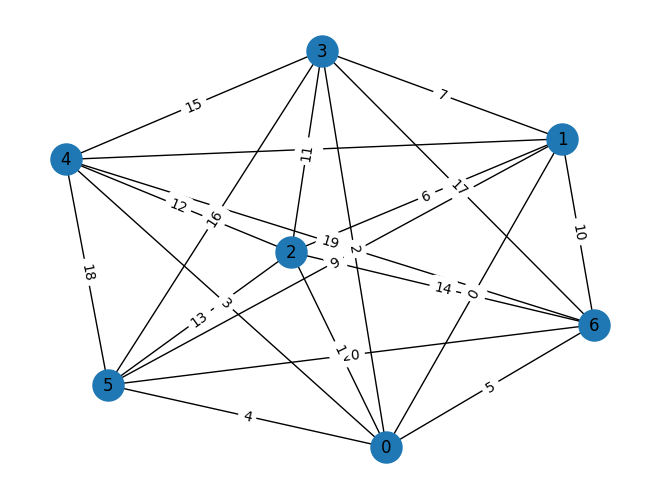

[('5', '0'), ('5', '1'), ('5', '2'), ('5', '3'), ('5', '6'), ('5', '4'), ('0', '1'), ('0', '2'), ('0', '3'), ('0', '6'), ('0', '4'), ('1', '2'), ('1', '3'), ('1', '6'), ('1', '4'), ('2', '3'), ('2', '6'), ('2', '4'), ('3', '6'), ('3', '4'), ('6', '4')]
{'id': '4'}
{'id': '9'}
{'id': '13'}
{'id': '16'}
{'id': '20'}
{'id': '18'}
{'id': '0'}
{'id': '1'}
{'id': '2'}
{'id': '5'}
{'id': '3'}
{'id': '6'}
{'id': '7'}
{'id': '10'}
{'id': '8'}
{'id': '11'}
{'id': '14'}
{'id': '12'}
{'id': '17'}
{'id': '15'}
{'id': '19'}


In [6]:
def draw(g):
    pos = nx.spring_layout(g)
    edge_labels = dict([((n1, n2), d[ATTR_NAMES[DATASET]["edge2"]]) for n1, n2, d in g.edges(data=True)])
    node_labels = nx.get_node_attributes(g, ATTR_NAMES[DATASET]["node2"])
    nx.draw(g, pos, labels=node_labels, node_size=500)
    nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)
    pylab.show()
g = nx.read_gexf(path=ORI_DIR+"/6.gexf")
draw(g)
print(g.edges)
for edge in list(g.edges()):
    print(g.edges[edge])

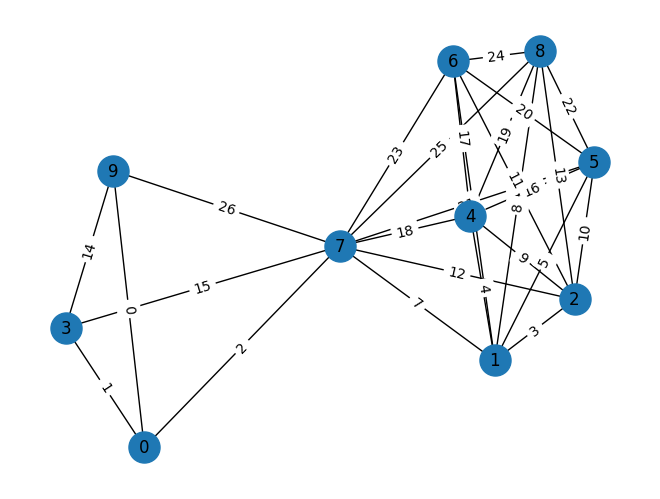

5
['1', '7', '5', '0', '9', '2', '3', '6', '8', '4']
{}


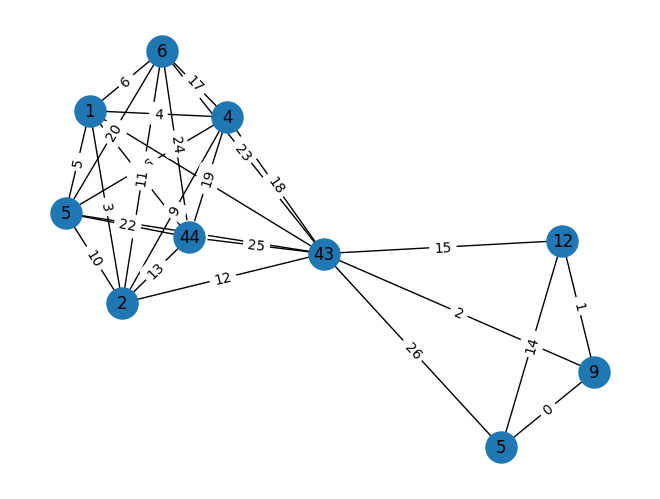

In [10]:
def random_node_relabeling(g, numbers):
    if numbers > g.number_of_nodes():
        numbers = g.number_of_nodes()

    # draw_type(g)
    i = 1
    lst = []
    while i <= numbers:
        # print(i,"-th random_node_relabeling")
        n = random.choice(list(g.nodes))
        assigned_type = random.choice(Node_Types)
        # print(g.node[n], assigned_type, lst)
        # print(ATTR_NAMES[DATASET]["edge2"])
        if (n in lst) or (g.nodes[n][ATTR_NAMES[DATASET]["node2"]] == assigned_type):
            continue
        else:
            g.nodes[n][ATTR_NAMES[DATASET]["node2"]] = assigned_type
            lst.append(n)
            # print(g.node[n])
            # draw_type(g)
            i += 1
    return numbers


g = nx.read_gexf(path=ORI_DIR+"/4.gexf")
draw(g)
print(random_node_relabeling(g, 5))
print(g.nodes())
print(nx.get_node_attributes(g, 'type'))
draw(g)

{}


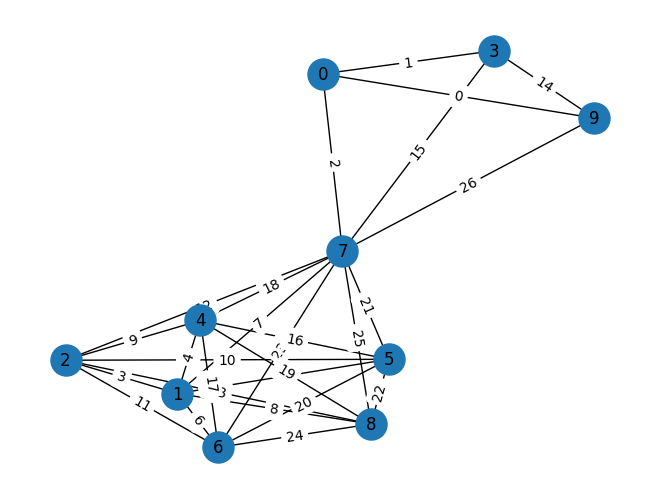

27


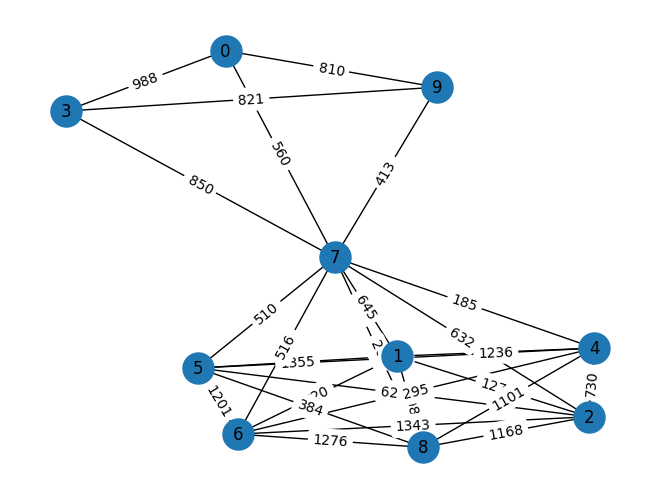

{}


In [11]:
def random_edge_relabeling(g, numbers):
    if numbers > g.number_of_edges():
        numbers = g.number_of_edges()

    # draw_type(g)
    i = 1
    lst = []

    while i <= numbers:
        # print(i,"-th random_edge_relabeling")
        n = random.choice(list(g.edges()))
        assigned_type = random.choice(Edge_Types)
        # print(g.edges[n], assigned_type, lst)
        if (n in lst) or (g.edges[n][ATTR_NAMES[DATASET]["edge2"]] == assigned_type):
            continue
        else:
            g.edges[n][ATTR_NAMES[DATASET]["edge2"]] = assigned_type
            lst.append(n)
            # print(g.edges[n])
            # draw_type(g)
            i += 1
    return numbers


g = nx.read_gexf(path=ORI_DIR+"/4.gexf")
print(nx.get_edge_attributes(g,'type'))
draw(g)
print(random_edge_relabeling(g, 99))
draw(g)
print(nx.get_edge_attributes(g,'type'))

In [12]:
def random_node_insertion(g, numbers):
    i = 1
    while i <= numbers:
        # print(i,"-th random_node_insertion")
        new_id = max(list(map(int, g.nodes))) + 1
        if DATASET == "AIDS":
            g.add_node(str(new_id), label=str(new_id), type=random.choice(Node_Types))
        else:
            g.add_node(str(new_id), label=str(new_id))
        # draw(g)
        i += 1
        # print(g.nodes)
    return numbers


g = nx.read_gexf(path=ORI_DIR+"/4.gexf")
random_node_insertion(g, 5)
print(g.nodes)
print(nx.get_node_attributes(g, 'label'))
print(nx.get_node_attributes(g, 'type'))

['1', '7', '5', '0', '9', '2', '3', '6', '8', '4', '10', '11', '12', '13', '14']
{'1': '1', '7': '7', '5': '5', '0': '0', '9': '9', '2': '2', '3': '3', '6': '6', '8': '8', '4': '4', '10': '10', '11': '11', '12': '12', '13': '13', '14': '14'}
{}


[('7', '5'), ('7', '0'), ('7', '9'), ('7', '11'), ('7', '8'), ('7', '4'), ('5', '0'), ('5', '9'), ('5', '11'), ('5', '8'), ('5', '4'), ('0', '9'), ('0', '11'), ('0', '8'), ('0', '4'), ('11', '9'), ('11', '8'), ('11', '4'), ('3', '10'), ('3', '1'), ('3', '2'), ('3', '6'), ('3', '12'), ('3', '4'), ('10', '1'), ('10', '2'), ('10', '6'), ('10', '12'), ('10', '4'), ('12', '1'), ('12', '2'), ('12', '6'), ('12', '4'), ('1', '2'), ('1', '6'), ('1', '4'), ('2', '6'), ('2', '4'), ('9', '8'), ('9', '4'), ('6', '4'), ('8', '4')]


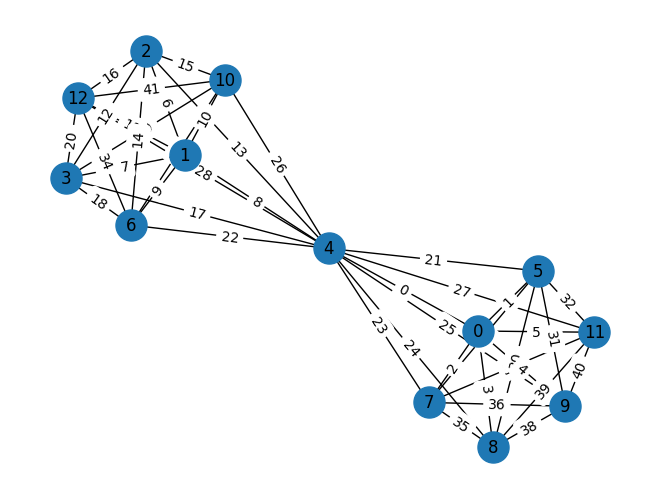

41 [('9', '8'), ('3', '6'), ('1', '2'), ('5', '9'), ('0', '4'), ('11', '4'), ('5', '8'), ('10', '4'), ('12', '4'), ('0', '11'), ('7', '5'), ('11', '8'), ('9', '4'), ('7', '9'), ('0', '9'), ('3', '2'), ('7', '0'), ('7', '8'), ('3', '1'), ('8', '4'), ('1', '6'), ('10', '6'), ('1', '4'), ('11', '9'), ('5', '4'), ('2', '6'), ('5', '0'), ('7', '11'), ('5', '11'), ('10', '2'), ('10', '1'), ('6', '4'), ('12', '6'), ('12', '2'), ('10', '12'), ('0', '8'), ('3', '10'), ('7', '4'), ('12', '1'), ('3', '12'), ('2', '4')]
[('3', '4')]
{('3', '4'): '17'}


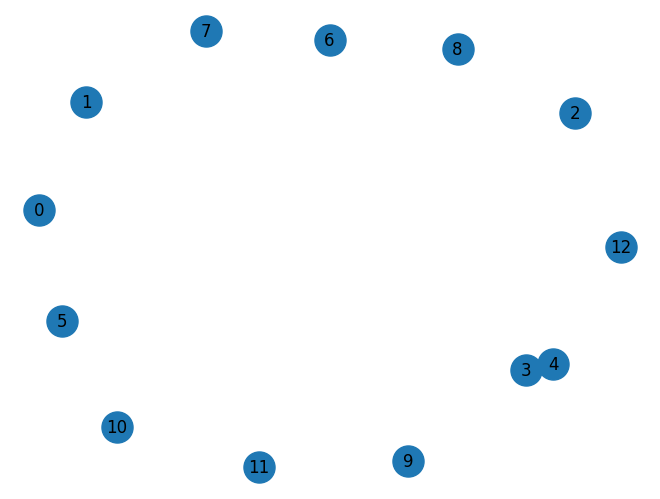

In [13]:

def random_edge_deletion(g, numbers):
    Del_Edge = []
    if numbers >= g.number_of_edges():
        numbers = g.number_of_edges() - 1
    i = 1
    while i <= numbers:
        # print(i,"-th random_edge_deletion")
        n = random.choice(list(g.edges()))
        Del_Edge.append(n)
        g.remove_edge(n[0], n[1])
        # draw(g)
        i += 1
        # print(Del_Edge)
        # print(g.edges)
    return numbers, Del_Edge


g = nx.read_gexf(path=ORI_DIR+"/1.gexf")
print(g.edges())
draw(g)
n, arr = random_edge_deletion(g, 99)
print(n, arr)
print(g.edges())
print(nx.get_edge_attributes(g, 'id'))
draw(g)

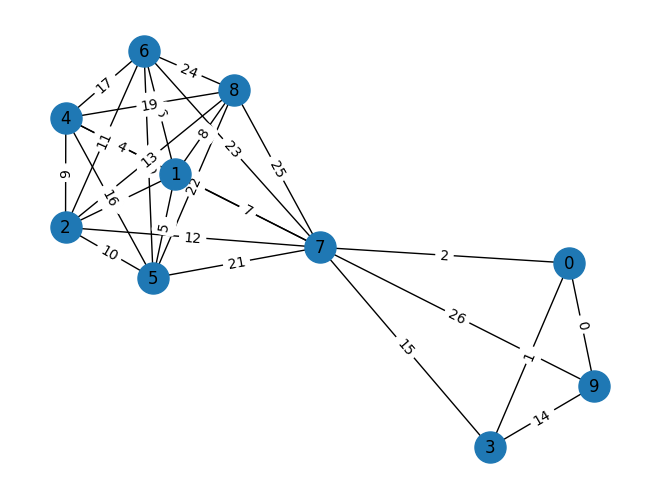

27
{('1', '7'): '7', ('1', '5'): '5', ('1', '2'): '3', ('1', '8'): '8', ('1', '6'): '6', ('1', '4'): '4', ('7', '5'): '21', ('7', '0'): '2', ('7', '9'): '26', ('7', '2'): '12', ('7', '3'): '15', ('7', '6'): '23', ('7', '8'): '25', ('7', '4'): '18', ('5', '2'): '10', ('5', '8'): '22', ('5', '6'): '20', ('5', '4'): '16', ('0', '9'): '0', ('0', '3'): '1', ('9', '3'): '14', ('2', '8'): '13', ('2', '6'): '11', ('2', '4'): '9', ('6', '8'): '24', ('6', '4'): '17', ('8', '4'): '19'}
ed:  3 [('0', '3'), ('7', '8'), ('2', '6')]


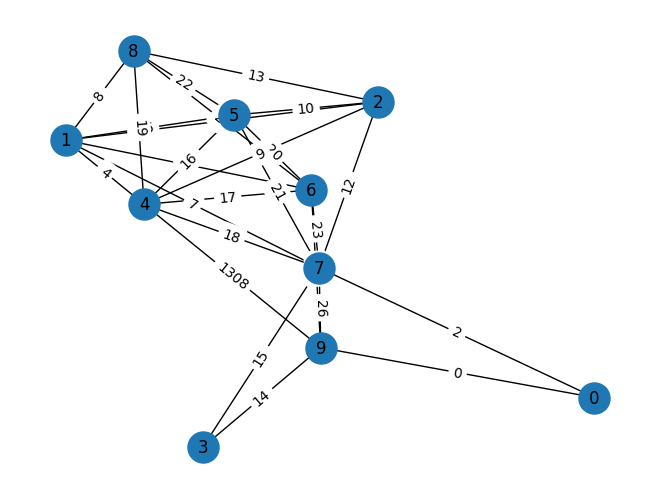

26
ei:  2
{('1', '7'): '7', ('1', '5'): '5', ('1', '2'): '3', ('1', '8'): '8', ('1', '6'): '6', ('1', '4'): '4', ('7', '5'): '21', ('7', '0'): '2', ('7', '9'): '26', ('7', '2'): '12', ('7', '3'): '15', ('7', '6'): '23', ('7', '4'): '18', ('5', '2'): '10', ('5', '8'): '22', ('5', '6'): '20', ('5', '4'): '16', ('0', '9'): '0', ('9', '3'): '14', ('9', '6'): '964', ('9', '4'): '1308', ('2', '8'): '13', ('2', '4'): '9', ('6', '8'): '24', ('6', '4'): '17', ('8', '4'): '19'}


In [14]:

def random_edge_insertion(g, numbers, Del_Edge):
    pairs = set(list(g.nodes()))
    arr = []
    lst = list(g.nodes())

    for i in range(0, len(lst)):
        for j in range(i + 1, len(lst)):
            arr.append((lst[i], lst[j]))
    # print(arr)

    ei_arr = list(set((a, b) if a <= b else (b, a) for a, b in arr))

    for i in range(0, numbers):
        for j in range(i + 1, numbers):
            ei_arr.append((str(i), str(j)))
    # print("ei_arr",ei_arr)
    for edge in g.edges():
        # print("edge",edge)
        if (edge[0], edge[1]) in ei_arr:
            ei_arr.remove((edge[0], edge[1]))
        else:
            ei_arr.remove((edge[1], edge[0]))

    for edge in Del_Edge:
        if (edge[0], edge[1]) in ei_arr:
            ei_arr.remove((edge[0], edge[1]))
        else:
            ei_arr.remove((edge[1], edge[0]))
    max_edge = len(ei_arr)
    # print(max_edge)

    if numbers > max_edge:
        numbers = max_edge

    i = 1
    while i <= numbers:
        # print(i,"-th random_edge_insertion")
        r = random.sample(ei_arr, 1)[0]
        # print(r)
        if DATASET == 'AIDS':
             g.add_edge(r[0], r[1], valence=random.choice(Edge_Types))
        else:
             g.add_edge(r[0], r[1], id=random.choice(Edge_Types))
        ei_arr.remove(r)
        # draw(g)
        i += 1
        # print(g.edges)
    return numbers


g = nx.read_gexf(path=ORI_DIR+"/4.gexf")
draw(g)
print(g.number_of_edges())
print(nx.get_edge_attributes(g, 'id'))
ed, Del_Edge = random_edge_deletion(g, 3)
print("ed: ",ed, Del_Edge)
# Del_Edge=[]
ei = random_edge_insertion(g, 2, Del_Edge)
draw(g)
print(g.number_of_edges())
print("ei: ", ei)
print(nx.get_edge_attributes(g, 'id'))

->0.gexf
Edge Deletion 0
Edge Insertion 3
NR,NID,ER,EI,ED:  0 5 0 3 0
GEV_SUM: 8
<-0_NR_0_NID_5_ER_0_EID_3.gexf
->1.gexf
Edge Deletion 3
Edge Insertion 3
NR,NID,ER,EI,ED:  0 2 0 3 3
GEV_SUM: 8
<-1_NR_0_NID_2_ER_0_EID_6.gexf
->10.gexf
Edge Deletion 3
Edge Insertion 1
NR,NID,ER,EI,ED:  0 4 0 1 3
GEV_SUM: 8
<-10_NR_0_NID_4_ER_0_EID_4.gexf
->1001.gexf
Edge Deletion 1
Edge Insertion 0
NR,NID,ER,EI,ED:  0 7 0 0 1
GEV_SUM: 8
<-1001_NR_0_NID_7_ER_0_EID_1.gexf
->1002.gexf
Edge Deletion 5
Edge Insertion 0
NR,NID,ER,EI,ED:  0 3 0 0 5
GEV_SUM: 8
<-1002_NR_0_NID_3_ER_0_EID_5.gexf
->1004.gexf
Edge Deletion 1
Edge Insertion 4
NR,NID,ER,EI,ED:  0 3 0 4 1
GEV_SUM: 8
<-1004_NR_0_NID_3_ER_0_EID_5.gexf
->1005.gexf
Edge Deletion 2
Edge Insertion 1
NR,NID,ER,EI,ED:  0 5 0 1 2
GEV_SUM: 8
<-1005_NR_0_NID_5_ER_0_EID_3.gexf
->1006.gexf
Edge Deletion 0
Edge Insertion 0
NR,NID,ER,EI,ED:  0 8 0 0 0
GEV_SUM: 8
<-1006_NR_0_NID_8_ER_0_EID_0.gexf
->1007.gexf
Edge Deletion 8
Edge Insertion 0
NR,NID,ER,EI,ED:  0 0 0 0 8

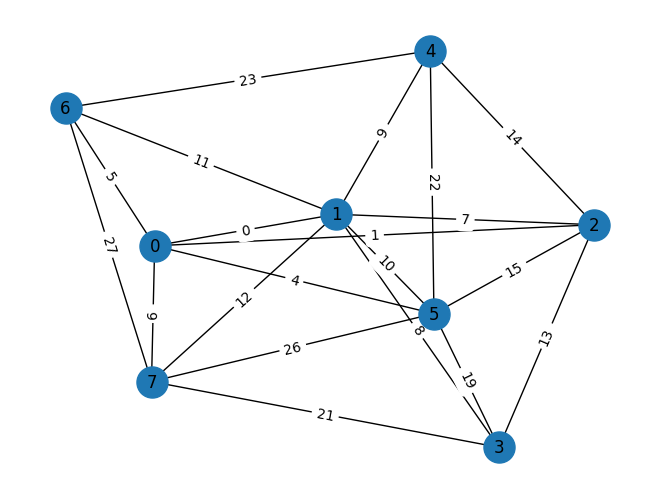

In [28]:


def GPG(g, NR, NID, ER, EID):
    if DATASET != "AIDS":
        NR = 0
        ER = 0
    Del_Edge = []
    G = g
    ED = random.randint(0, EID)
    # draw(g)
    NR = random_node_relabeling(g, NR)
    NID = random_node_insertion(g, NID)
    ED, Del_Edge = random_edge_deletion(g, ED)

    ER = random_edge_relabeling(g, ER)
    EI = random_edge_insertion(g, EID - ED, Del_Edge)
    EID = EI + ED
    print("Edge Deletion", ED)
    print("Edge Insertion", EI)
    print("NR,NID,ER,EI,ED: ", NR, NID, ER, EI, ED)
    GEV = NR + NID + ER + EID
    print("GEV_SUM:", GEV)
    gev_info = "_NR_" + str(NR) + "_NID_" + str(NID) + "_ER_" + str(ER) + "_EID_" + str(EID)
    return gev_info


filenames = os.listdir(ORI_DIR)
for i in range(1):
    for filename in filenames:
        if filename.endswith(".gexf"):
            print("->"+filename)
            g =  nx.read_gexf(path=ORI_DIR+"\\"+filename)
            rand = random.randint(0, 8)
            gev_info = GPG(g, 0, rand, 0, 8-rand)
            nx.write_gexf(G=g, path=GEN_DIR+"\\" +filename[:-5]+gev_info+".gexf")
            print("<-"+filename[:-5]+gev_info+".gexf")

# TEST_MAX = 300
# i = 0
# for filename in filenames:
#     if filename.endswith(".gexf"):
#         print("->" + filename)
#         g = nx.read_gexf(path=ORI_DIR + "\\" + filename)
#         gev_info = GPG(g, random.randint(0, 5), random.randint(0, 5), random.randint(0, 5), random.randint(0, 5))
#         nx.write_gexf(G=g, path=TEST_DIR+"\\" + filename[:-5] + gev_info + ".gexf")
#         print("<-" + filename[:-5] + gev_info + ".gexf")
#         i =i+1
#     if i>=TEST_MAX:
#         break

draw(g)

ori 4 nr 0 nid 4 er 2 eid 5 gev 11
nlm0 {'{"O": 1}': 6, '{"S": 1}': 2, '{"C": 1}': 2}
nlm1 {'{"S": 1}': 6, '{"O": 3, "C": 1}': 2, '{"S": 1, "C": 1}': 1, '{"C": 1, "S": 1}': 1}
elm0 {'{"2": 1}': 4, '{"1": 1}': 5}
('7', '3')
{'type': 'O', 'label': '7'}
('3', '1')
{'type': 'S', 'label': '3'}
('3', '8')
{'type': 'S', 'label': '3'}
('3', '9')
{'type': 'S', 'label': '3'}
('5', '2')
{'type': 'O', 'label': '5'}
('6', '2')
{'type': 'O', 'label': '6'}
('1', '0')
{'type': 'C', 'label': '1'}
('0', '2')
{'type': 'C', 'label': '0'}
('4', '2')
{'type': 'O', 'label': '4'}


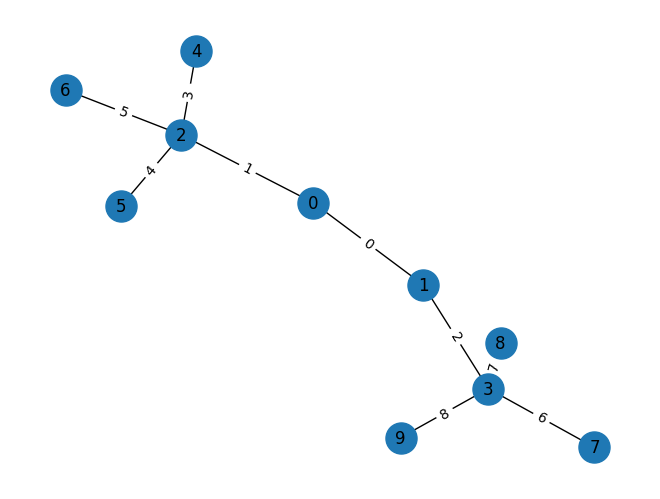

In [103]:


filename = "4_NR_0_NID_4_ER_2_EID_5.gexf"
g = nx.read_gexf(path="./export/" + filename)
# draw(g)
reg = re.sub(".*NR_(?P<nr>\d+)_NID_(?P<nid>\d+)_ER_(?P<er>\d+)_EID_(?P<eid>\d+).gexf", "\g<eid>", filename)
ori = re.sub("(?P<t>.+?)_.*", "\g<t>", filename)
nr = int(re.sub(".*NR_(?P<t>.+?)_.*", "\g<t>", filename))
nid = int(re.sub(".*NID_(?P<t>.+?)_.*", "\g<t>", filename))
er = int(re.sub(".*ER_(?P<t>.+?)_.*", "\g<t>", filename))
eid = int(re.sub(".*EID_(?P<t>.+?).gexf", "\g<t>", filename))
gev = nr + nid + er + eid
print('ori', ori, 'nr', nr, 'nid', nid, 'er', er, 'eid', eid, 'gev', gev)

g_ori = nx.read_gexf(path="./train/" + ori + ".gexf")
# draw(g_ori)
# print(nx.adjacency_matrix(g))

import json

nlm0 = {}
for node in g_ori.nodes():
    t = g_ori.nodes[node]['type']
    # print(t)
    dic = {t: 1}
    str_key = json.dumps(dic)
    if nlm0.get(str_key):
        nlm0[str_key] = nlm0.get(str_key) + 1
    else:
        nlm0[str_key] = 1

print('nlm0', nlm0)

nlm1 = {}
for node in g_ori.nodes():
    neighbors = [n for n in g_ori.neighbors(node)]
    # print(neighbors)
    dic = {}
    for neighbor in neighbors:
        t = g_ori.nodes[neighbor]['type']
        # print(t)
        if dic.get(t):
            dic[t] = dic.get(t) + 1
        else:
            dic[t] = 1

    # print(dic)
    # print(json.dumps(dic))
    if nlm1.get(json.dumps(dic)):
        nlm1[json.dumps(dic)] = nlm1.get(json.dumps(dic)) + 1
    else:
        nlm1[json.dumps(dic)] = 1

    # print('----------------')
print("nlm1", nlm1)

elm0 = {}
for edge in g_ori.edges():
    t = g_ori.edges[edge]['valence']
    # print(t)
    dic = {t: 1}
    str_key = json.dumps(dic)
    if elm0.get(str_key):
        elm0[str_key] = elm0.get(str_key) + 1
    else:
        elm0[str_key] = 1

print('elm0', elm0)

elm1 = {}
for edge in g_ori.edges():
    print(edge)
    print(g_ori.nodes[edge[0]])

draw(g_ori)

Legacy Model

In [9]:


import torch
import torch.nn as nn
import torch.nn.functional as functional


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, args, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.args = args
        self.input_dim = input_dim
        self.setup_weights()
        self.init_parameters()


    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(
            torch.Tensor(self.input_dim, self.input_dim, self.args["tensor_neurons"]))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.args["tensor_neurons"], 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.args["tensor_neurons"], 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.args["tensor_neurons"])
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


class GraphAggregationLayer(nn.Module):

    def __init__(self, in_features=10, out_features=10):
        super(GraphAggregationLayer, self).__init__()
        self.in_features = in_features
        self.out_features = out_features

    def forward(self, input, adj):
        h_prime = torch.mm(adj, input)
        return h_prime

    def __repr__(self):
        return self.__class__.__name__ + ' (' + str(self.in_features) + ' -> ' + str(self.out_features) + ')'


def graph_aggregation_layer(adj, features):
    hidden1 = torch.mm(adj, features)
    hidden2 = torch.mm(adj, hidden1)
    return hidden1, hidden2


class TaGSim(torch.nn.Module):
    def __init__(self, args, number_of_node_labels, number_of_edge_labels):
        super(TaGSim, self).__init__()
        self.args = args
        self.number_of_node_labels = len(number_of_node_labels)
        self.number_of_edge_labels = len(number_of_edge_labels)
        self.bottle_neck_neurons = args["bottle_neck_neurons"]
        self.setup_layers()

    def gal_pass(self, edge_index, features):
        hidden1 = self.gal1(features, edge_index)
        hidden2 = self.gal2(hidden1, edge_index)
        return hidden1, hidden2

    def setup_layers(self):
        self.gal1 = GraphAggregationLayer()
        self.gal2 = GraphAggregationLayer()
        self.feature_count = self.args["tensor_neurons"]

        self.tensor_network_nc = TensorNetworkModule(self.args, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.args, 2 * self.number_of_node_labels)
        self.tensor_network_ie = TensorNetworkModule(self.args, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.args, 2 * self.number_of_edge_labels)

        self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def forward(self, data):
        adj_1, adj_2 = torch.FloatTensor(np.array(data["edge_index_1"].todense())), torch.FloatTensor(
            np.array(data["edge_index_2"].todense()))
        edge_adj_1, edge_adj_2 = data["edge_adj_1"], data["edge_adj_2"]
        node_features_1, node_features_2 = data["node_features_1"], data["node_features_2"]
        edge_features_1, edge_features_2 = data["edge_features_1"], data["edge_features_2"]

        #gal
        graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, node_features_1)  #
        graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, node_features_2)  #
        edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)
        edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)

        #node level embedding Concatenation
        graph1_01concat = torch.cat([node_features_1, graph1_hidden1], dim=1)
        graph2_01concat = torch.cat([node_features_2, graph2_hidden1], dim=1)
        graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
        graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)

        #graph pooling: node Sum
        graph1_01pooled = torch.sum(graph1_01concat, dim=0).unsqueeze(1)
        graph2_01pooled = torch.sum(graph2_01concat, dim=0).unsqueeze(1)
        graph1_12pooled = torch.sum(graph1_12concat, dim=0).unsqueeze(1)
        graph2_12pooled = torch.sum(graph2_12concat, dim=0).unsqueeze(1)

        #edge level embedding Concatenation
        edge1_01concat = torch.cat([edge_features_1, edge1_hidden1], dim=1)
        edge2_01concat = torch.cat([edge_features_2, edge2_hidden1], dim=1)

        #graph pooling: edge Sum
        edge1_01pooled = torch.sum(edge1_01concat, dim=0).unsqueeze(1)
        edge2_01pooled = torch.sum(edge2_01concat, dim=0).unsqueeze(1)

        scores_nc = self.tensor_network_nc(graph1_01pooled, graph2_01pooled)
        scores_nc = torch.t(scores_nc)
        scores_nc = torch.nn.functional.relu(self.fully_connected_first_nc(scores_nc))
        scores_nc = torch.nn.functional.relu(self.fully_connected_second_nc(scores_nc))
        scores_nc = torch.nn.functional.relu(self.fully_connected_third_nc(scores_nc))
        score_nc = torch.sigmoid(self.scoring_layer_nc(scores_nc))

        scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
        scores_in = torch.t(scores_in)
        scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
        score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

        scores_ie = self.tensor_network_ie(graph1_12pooled, graph2_12pooled)
        scores_ie = torch.t(scores_ie)
        scores_ie = torch.nn.functional.relu(self.fully_connected_first_ie(scores_ie))
        scores_ie = torch.nn.functional.relu(self.fully_connected_second_ie(scores_ie))
        scores_ie = torch.nn.functional.relu(self.fully_connected_third_ie(scores_ie))
        score_ie = torch.sigmoid(self.scoring_layer_ie(scores_ie))

        scores_ec = self.tensor_network_ec(edge1_01pooled, edge2_01pooled)
        scores_ec = torch.t(scores_ec)
        scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
        score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

        return torch.cat([score_nc, score_in, score_ie, score_ec], dim=1)


class TaGSimTrainer(object):
    def __init__(self, args):
        self.args = args
        number_of_node_labels, number_of_edge_labels =getTypeInfo()
        self.number_of_node_labels = number_of_node_labels
        self.number_of_edge_labels = number_of_edge_labels
        training_pairs, testing_pairs, = load_pairs()
        self.training_pairs = training_pairs
        self.testing_pairs = testing_pairs
        self.node_type = number_of_node_labels
        self.edge_type = number_of_edge_labels
        self.model = TaGSim(self.args, self.number_of_node_labels, self.number_of_edge_labels)

    def transfer_to_torch(self, data, type_specified=True):
        new_data = dict()
        graph1, graph2 = data['graph_pair'][0], data['graph_pair'][1]

        #node and edge info of pair graph
        node_info1 = nx.get_node_attributes(graph1, ATTR_NAMES[DATASET]["node2"])
        node_info2 = nx.get_node_attributes(graph2, ATTR_NAMES[DATASET]["node2"])
        edge_info1 = nx.get_edge_attributes(graph1, ATTR_NAMES[DATASET]["edge2"])
        edge_info2 = nx.get_edge_attributes(graph2, ATTR_NAMES[DATASET]["edge2"])

        node_features_1, node_features_2, edge_features_1, edge_features_2, edge_adj_1, edge_adj_2 = [], [], [], [], [], []

        for n in graph1.nodes():
            node_features_1.append([1.0 if node_info1[n] == node else 0.0 for node in self.node_type])

        node_features_1 = torch.FloatTensor(np.array(node_features_1))

        for n in graph2.nodes():
            node_features_2.append([1.0 if node_info2[n] == node else 0.0 for node in self.node_type])

        node_features_2 = torch.FloatTensor(np.array(node_features_2))

        for e in graph1.edges():
            edge_features_1.append([1.0 if edge_info1[e] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in graph1.edges():
                if (e == d):
                    adj_row.append(0.0)
                    continue
                if ((e[0] in d) | (e[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_1.append(adj_row)

        edge_features_1 = torch.FloatTensor(np.array(edge_features_1))
        edge_adj_1 = torch.FloatTensor(np.array(edge_adj_1))

        for e in graph2.edges():
            edge_features_2.append([1.0 if edge_info2[e] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in graph2.edges():
                if (e == d):
                    adj_row.append(0.0)
                    continue
                if ((e[0] in d) | (e[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_2.append(adj_row)

        edge_features_2 = torch.FloatTensor(np.array(edge_features_2))
        edge_adj_2 = torch.FloatTensor(np.array(edge_adj_2))

        new_data["edge_index_1"], new_data["edge_index_2"] = nx.adjacency_matrix(
            graph1), nx.adjacency_matrix(graph2)
        new_data["node_features_1"], new_data["node_features_2"] = node_features_1, node_features_2
        new_data["edge_features_1"], new_data["edge_features_2"] = edge_features_1, edge_features_2
        new_data["edge_adj_1"], new_data["edge_adj_2"] = edge_adj_1, edge_adj_2

        #ged normalisation
        avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
        if (type_specified):
            # norm_ged = [ged.count(key) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())) for key in ['1', '2', '3', '4']]
            norm_ged = [float(n) / avg_node_number for n in data["ged"]]
            norm_ged = np.array(norm_ged)
            new_data["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (sum(data["ged"])) / avg_node_number
            new_data["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:
            #TODO
            # norm_gt_ged = (data["ged"]) / avg_node_number
            norm_gt_ged = (data["gt_ged"]) / avg_node_number
            new_data["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return new_data

    def fit(self):
        print("\n-------Model training---------.\n")

        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.args["lr"],
                                          weight_decay=self.args["weight_decay"])

        iteration = 0
        iter_arr = []
        training_losses_arr = []
        validation_error_arr = []
        for epoch in range(self.args["epochs"]):
            random.shuffle(self.training_pairs)
            batches = []

            for graph in range(0, len(self.training_pairs), self.args["batch_size"]):
                batches.append(self.training_pairs[graph:graph + self.args["batch_size"]])

            for batch in batches:
                # print(batch)
                self.model.train()
                self.optimizer.zero_grad()
                losses = 0
                corrects = 0.0
                for graph_pair in batch:
                    data = self.transfer_to_torch(graph_pair)
                    prediction = self.model(data)
                    losses += torch.nn.functional.mse_loss(data["target"], prediction)

                losses.backward(retain_graph=True)
                self.optimizer.step()
                loss = losses.item()
                training_losses_arr.append(loss / len(batch))
                iter_arr.append(iteration)
                print('Iteration', iteration, 'loss: ', loss / len(batch))
                validation_error = self.test()
                validation_error_arr.append(validation_error)
                iteration += 1

        plt.plot(iter_arr,training_losses_arr,label='training loss')
        plt.plot(iter_arr,validation_error_arr,label='validation loss')
        plt.xlabel('epoch')
        plt.ylabel('loss rate')
        plt.title('TaGSim model GED training rate per epoch')
        plt.legend()
        plt.show()


    def test(self):
        self.model.eval()
        self.test_scores = []

        for n in self.testing_pairs:
            # graph1 = n['graph_pair'][0]
            # graph2 = n['graph_pair'][1]
            # graph2 = n['ged']
            # curr_graph_pair = {'graph_pair': [graph1, graph2], 'ged':ged}
            data = self.transfer_to_torch(n, type_specified=False)
            prediction = self.model(data)
            prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
            current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
            self.test_scores.append(current_error.data.item())

        model_error = sum(self.test_scores) / len(self.test_scores)
        print("Model test error: " + str(model_error))
        return model_error

In [10]:
args = {"dataset": DATASET,
        "tensor_neurons": 16,
        "bottle_neck_neurons": 16,
        "lr": 0.001,
        "weight_decay": 0.0,
        "epochs": 10,
        "batch_size": 128
        }

trainer = TaGSimTrainer(args)
trainer.fit()
# trainer.test()

NameError: name 'getTypeInfo' is not defined

In [122]:
i = 0
filenames = os.listdir(TEST_DIR)
for filename in filenames:
    if filename.endswith(".gexf"):
        print("->" + filename)
        g = nx.read_gexf(path=TEST_DIR + "\\" + filename)
        gev_info = GPG(g, 0, random.randint(0, 3), 0, random.randint(0, 3))
        nx.write_gexf(G=g, path=TEST_GEN_DIR+"\\" + filename[:-5] + gev_info + ".gexf")
        print("<-" + filename[:-5] + gev_info + ".gexf")


->100.gexf
Edge Deletion 2
Edge Insertion 0
NR,NID,ER,EI,ED:  0 3 0 0 2
GEV_SUM: 5
<-100_NR_0_NID_3_ER_0_EID_2.gexf
->1000.gexf
Edge Deletion 0
Edge Insertion 0
NR,NID,ER,EI,ED:  0 2 0 0 0
GEV_SUM: 2
<-1000_NR_0_NID_2_ER_0_EID_0.gexf
->1003.gexf
Edge Deletion 0
Edge Insertion 0
NR,NID,ER,EI,ED:  0 1 0 0 0
GEV_SUM: 1
<-1003_NR_0_NID_1_ER_0_EID_0.gexf
->1008.gexf
Edge Deletion 2
Edge Insertion 0
NR,NID,ER,EI,ED:  0 2 0 0 2
GEV_SUM: 4
<-1008_NR_0_NID_2_ER_0_EID_2.gexf
->1011.gexf
Edge Deletion 0
Edge Insertion 1
NR,NID,ER,EI,ED:  0 3 0 1 0
GEV_SUM: 4
<-1011_NR_0_NID_3_ER_0_EID_1.gexf
->1014.gexf
Edge Deletion 2
Edge Insertion 0
NR,NID,ER,EI,ED:  0 1 0 0 2
GEV_SUM: 3
<-1014_NR_0_NID_1_ER_0_EID_2.gexf
->102.gexf
Edge Deletion 0
Edge Insertion 3
NR,NID,ER,EI,ED:  0 1 0 3 0
GEV_SUM: 4
<-102_NR_0_NID_1_ER_0_EID_3.gexf
->1020.gexf
Edge Deletion 1
Edge Insertion 1
NR,NID,ER,EI,ED:  0 1 0 1 1
GEV_SUM: 3
<-1020_NR_0_NID_1_ER_0_EID_2.gexf
->1026.gexf
Edge Deletion 0
Edge Insertion 0
NR,NID,ER,EI,ED

In [125]:
#temp TODO testing_pair.csv

def node_subst_cost(node1, node2):
    # check if the nodes are equal, if yes then apply no cost, else apply 1
    if node1 == node2:
        return 0
    return 1


def node_del_cost(node):
    return 1  # here you apply the cost for node deletion


def node_ins_cost(node):
    return 1  # here you apply the cost for node insertion


# arguments for edges
def edge_subst_cost(edge1, edge2):
    # check if the edges are equal, if yes then apply no cost, else apply 3
    if edge1 == edge2:
        return 0
    return 1


def edge_del_cost(node):
    return 1  # here you apply the cost for edge deletion


def edge_ins_cost(node):
    return 1  # here you apply the cost for edge insertion


test_data = []
test_max = 0
filenames = os.listdir(TEST_GEN_DIR)
while test_max < 70:
    file1 = random.choice(filenames)
    ori, ged = getFileInfo(file1)
    file2 = ori
    print(file1, file2)
    graph2 = nx.read_gexf(path=TEST_GEN_DIR + '/' + file1)
    graph1 = nx.read_gexf(path=TEST_DIR + '/' + file2)
    for v in nx.optimize_graph_edit_distance(graph1, graph2,
                                             node_subst_cost=node_subst_cost,
                                             node_del_cost=node_del_cost,
                                             node_ins_cost=node_ins_cost,
                                             edge_subst_cost=edge_subst_cost,
                                             edge_del_cost=edge_del_cost,
                                             edge_ins_cost=edge_ins_cost):
        minv = v
    # cost = random.randint(0,9999)
    test_data.append([file1, file2, minv])
    test_max += 1
    print("Processing:", str(test_max) + "/" + "70", "G1:" + file1 + " G2:" + file2, "gt_ged:", minv)
test_csv = pd.DataFrame(test_data, columns=['G1', 'G2', 'gt_ged']).to_csv(DATASET_FOLDER + "/testing_pairs.csv",
                                                                          index=False)
print("testing_pairs.csv is saved!")

1466_NR_0_NID_2_ER_0_EID_3.gexf 1466.gexf
Processing: 1/70 G1:1466_NR_0_NID_2_ER_0_EID_3.gexf G2:1466.gexf gt_ged: 5.0
60_NR_0_NID_1_ER_0_EID_3.gexf 60.gexf
Processing: 2/70 G1:60_NR_0_NID_1_ER_0_EID_3.gexf G2:60.gexf gt_ged: 4.0
694_NR_0_NID_3_ER_0_EID_1.gexf 694.gexf
Processing: 3/70 G1:694_NR_0_NID_3_ER_0_EID_1.gexf G2:694.gexf gt_ged: 4.0
1026_NR_0_NID_1_ER_0_EID_0.gexf 1026.gexf
Processing: 4/70 G1:1026_NR_0_NID_1_ER_0_EID_0.gexf G2:1026.gexf gt_ged: 1.0
226_NR_0_NID_2_ER_0_EID_0.gexf 226.gexf
Processing: 5/70 G1:226_NR_0_NID_2_ER_0_EID_0.gexf G2:226.gexf gt_ged: 2.0
896_NR_0_NID_1_ER_0_EID_2.gexf 896.gexf
Processing: 6/70 G1:896_NR_0_NID_1_ER_0_EID_2.gexf G2:896.gexf gt_ged: 3.0
1379_NR_0_NID_0_ER_0_EID_1.gexf 1379.gexf
Processing: 7/70 G1:1379_NR_0_NID_0_ER_0_EID_1.gexf G2:1379.gexf gt_ged: 1.0
1120_NR_0_NID_2_ER_0_EID_1.gexf 1120.gexf
Processing: 8/70 G1:1120_NR_0_NID_2_ER_0_EID_1.gexf G2:1120.gexf gt_ged: 3.0
145_NR_0_NID_3_ER_0_EID_0.gexf 145.gexf
Processing: 9/70 G1:145_NR_0

PermissionError: [Errno 13] Permission denied: './dataset/IMDB/testing_pairs.csv'

In [6]:
# test_csv = pd.DataFrame(test_data, columns=['G1', 'G2', 'gt_ged']).to_csv(DATASET_FOLDER + "/testing_pairs.csv",
#                                                                           index=False)
def load_pairs():
    train_pairs = []
    train_csv = pd.read_csv(DATASET_FOLDER+"/training_pairs.csv")
    for index, row in train_csv.iterrows():
        file1 = row['G1']
        file2 = row['G2']
        ged =ast.literal_eval(row['GED'])
        new_ged = [ged[1],ged[3]]
        gt_ged = row['gt_ged']
        graph1 = nx.read_gexf(path=ORI_DIR + '/' + file1)
        graph2 = nx.read_gexf(path=GEN_DIR + '/' + file2)
        train_pairs.append({"graph_pair": [graph1, graph2], "ged": new_ged, "gt_ged":gt_ged})


    test_pairs = []
    test_csv = pd.read_csv(DATASET_FOLDER+"/testing_pairs.csv")
    for index, row in test_csv.iterrows():
        file1 = row['G1']
        file2 = row['G2']
        gt_ged = row['gt_ged']
        graph1 = nx.read_gexf(path=TEST_DIR + '/' + file1)
        graph2 = nx.read_gexf(path=TEST_DIR + '/' + file2)
        test_pairs.append({"graph_pair": [graph1, graph2], "gt_ged": gt_ged})
    return train_pairs, test_pairs
train_pairs, test_pairs = load_pairs()
print(len(train_pairs))
print(train_pairs[0])
print(len(test_pairs))
print(test_pairs[0])

1200
{'graph_pair': [<networkx.classes.graph.Graph object at 0x000001AC5A906860>, <networkx.classes.graph.Graph object at 0x000001AC5A906680>], 'ged': [5, 3], 'gt_ged': 8}
75
{'graph_pair': [<networkx.classes.graph.Graph object at 0x000001AC52612560>, <networkx.classes.graph.Graph object at 0x000001AC52611900>], 'gt_ged': 17.0}


In [145]:
# train_data = []
# filenames = os.listdir(GEN_DIR)
# for i in range(len(filenames)):
#     fileInfo = getFileInfo(filenames[i])
#     graph2 = nx.read_gexf(path=GEN_DIR + '\\' + filenames[i])
#     graph1 = nx.read_gexf(path=ORI_DIR + '\\' + fileInfo[0])
#     ged = fileInfo[1]
#     train_data.append([fileInfo[0],filenames[i],ged,sum(ged)])
#     print("Processing:",str(i) + "/" + str(len(filenames)), "G1:"+fileInfo[0]+" G2:"+filenames[i],"GEV:",ged,"gt_ged:",sum(ged) )
#
# train_csv = pd.DataFrame(train_data, columns=['G1', 'G2', 'GED','gt_ged']).to_csv(DATASET_FOLDER+"/training_pairs.csv", index = False)
# print("training_pairs.csv is saved!")


test_data = []
test_max = 0
filenames = os.listdir(TEST_DIR)
while test_max < 70:
    file1 = random.choice(filenames)
    file2 = random.choice(filenames)
    graph1 = nx.read_gexf(path=TEST_DIR + '/' + file1)
    graph2 = nx.read_gexf(path=TEST_DIR + '/' + file2)
    for v in nx.optimize_graph_edit_distance(graph1, graph2,
                                             node_subst_cost=node_subst_cost,
                                             node_del_cost=node_del_cost,
                                             node_ins_cost=node_ins_cost,
                                             edge_subst_cost=edge_subst_cost,
                                             edge_del_cost=edge_del_cost,
                                             edge_ins_cost=edge_ins_cost):
        minv = v
    test_data.append([file1, file2, minv])
    test_max += 1
    print("Processing:", str(test_max) + "/" + "70", "G1:" + file1 + " G2:" + file2, "gt_ged:", minv)
    test_csv = pd.DataFrame(test_data, columns=['G1', 'G2', 'gt_ged']).to_csv(DATASET_FOLDER + "/testing_pairs.csv",
                                                                              index=False)
print("testing_pairs.csv is saved!")






Processing: 1/70 G1:737.gexf G2:449.gexf gt_ged: 0.0
Processing: 2/70 G1:1071.gexf G2:1236.gexf gt_ged: 63.0


KeyboardInterrupt: 

In [ ]:
import time, threading
def fun():
  # print(threading.current_thread().name, "is running")
  # time.sleep(5)
  # print(threading.current_thread().name, "is running")
  test_max = 0
  filenames = os.listdir(TEST_DIR)
  file1 = random.choice(filenames)
  file2 = random.choice(filenames)
  graph1 = nx.read_gexf(path=TEST_DIR + '/' + file1)
  graph2 = nx.read_gexf(path=TEST_DIR + '/' + file2)
  paths, cost = nx.optimal_edit_paths(graph1, graph2)
  print("G1:"+file1+" G2:"+file2,"gt_ged:",cost,"Processing:",str(test_max) + "/" + "70",threading.current_thread().name)

p_list = []
counter = 0
while(counter< 10):
  for i in range(120):
    p = threading.Thread(target=fun)
    p.start()
    p_list.append(p)
  for j in p_list:
    print(j)
    j.join()
  counter+=1

<Thread(Thread-5 (fun), started 19976)>
G1:404.gexf G2:960.gexf gt_ged: 5.0 Processing: 0/70 Thread-36 (fun)
G1:675.gexf G2:479.gexf gt_ged: 8.0 Processing: 0/70 Thread-116 (fun)
G1:1100.gexf G2:759.gexf gt_ged: 0.0 Processing: 0/70 Thread-71 (fun)
G1:765.gexf G2:765.gexf gt_ged: 0.0 Processing: 0/70 Thread-69 (fun)
G1:659.gexf G2:875.gexf gt_ged: 0.0 Processing: 0/70 Thread-60 (fun)
G1:636.gexf G2:127.gexf gt_ged: 9.0 Processing: 0/70 Thread-44 (fun)
G1:380.gexf G2:556.gexf gt_ged: 8.0 Processing: 0/70 Thread-90 (fun)
G1:959.gexf G2:471.gexf gt_ged: 8.0 Processing: 0/70 Thread-6 (fun)
G1:1325.gexf G2:636.gexf gt_ged: 8.0 Processing: 0/70 Thread-18 (fun)
G1:646.gexf G2:434.gexf gt_ged: 26.0 Processing: 0/70 Thread-43 (fun)
G1:938.gexf G2:495.gexf gt_ged: 11.0 Processing: 0/70 Thread-39 (fun)
G1:404.gexf G2:1397.gexf gt_ged: 26.0 Processing: 0/70 Thread-5 (fun)
<Thread(Thread-6 (fun), stopped 27448)>
<Thread(Thread-7 (fun), started 7536)>
G1:354.gexf G2:825.gexf gt_ged: 17.0 Processing:

In [127]:
def load_pairs():
    train_pairs = []
    train_csv = pd.read_csv(DATASET_FOLDER+"/training_pairs.csv")
    for index, row in train_csv.iterrows():
        file = row['G2']
        ged =ast.literal_eval(row['GED'])
        new_ged = [ged[1],ged[3]]
        gt_ged = row['gt_ged']
        graph1 = nx.read_gexf(path=ORI_DIR + '/' + ori)
        graph2 = nx.read_gexf(path=GEN_DIR + '/' + file)
        train_pairs.append({"graph_pair": [graph1, graph2], "ged": new_ged, "gt_ged":gt_ged})


    test_pairs = []
    test_csv = pd.read_csv(DATASET_FOLDER+"/testing_pairs.csv")
    for index, row in test_csv.iterrows():
        file1 = row['G1']
        file2 = row['G2']
        gt_ged = row['gt_ged']
        graph1 = nx.read_gexf(path=TEST_DIR + '/' + file1)
        graph2 = nx.read_gexf(path=TEST_DIR + '/' + file2)
        test_pairs.append({"graph_pair": [graph1, graph2], "gt_ged": gt_ged})
    return train_pairs, test_pairs
train_pairs, test_pairs = load_pairs()
print(len(train_pairs))
print(train_pairs[0])
print(len(test_pairs))
print(test_pairs[0])

FileNotFoundError: [Errno 2] No such file or directory: './dataset/IMDB/original/1482.gexf'

In [41]:
def getFileInfo(filename):
    # if test is False:
    #     g = nx.read_gexf(path="./dataset/"+datasetName+ + filename)
    # else:
    # draw(g)
    reg = re.sub(".*NR_(?P<nr>\d+)_NID_(?P<nid>\d+)_ER_(?P<er>\d+)_EID_(?P<eid>\d+).gexf", "\g<eid>", filename)
    ori = re.sub("(?P<t>.+?)_.*", "\g<t>", filename)
    nr = int(re.sub(".*NR_(?P<t>.+?)_.*", "\g<t>", filename))
    nid = int(re.sub(".*NID_(?P<t>.+?)_.*", "\g<t>", filename))
    er = int(re.sub(".*ER_(?P<t>.+?)_.*", "\g<t>", filename))
    eid = int(re.sub(".*EID_(?P<t>.+?).gexf", "\g<t>", filename))
    gev = nr + nid + er + eid
    # return [ori+'.gexf',str(nr)+str(nid)+str(er)+str(eid)]
    return [ori + '.gexf', [nr, nid, er, eid]]
    # print('ori',ori, 'nr',nr, 'nid',nid, 'er',er, 'eid',eid,'gev',gev)


ori, ged = getFileInfo("4_NR_0_NID_4_ER_2_EID_5.gexf")
print(ori, ged)
print(sum(ged))

4.gexf [0, 4, 2, 5]
11


BASELINE MODEL


-------Model training---------.



E:\AppData\Local\Temp\ipykernel_7428\1872905664.py:198: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
E:\AppData\Local\Temp\ipykernel_7428\1872905664.py:199: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  graph1), nx.adjacency_matrix(graph2)
E:\AppData\Local\Temp\ipykernel_7428\1872905664.py:198: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(


Iteration 0 loss:  0.10862365365028381
Iteration 1 loss:  0.09733052551746368
Iteration 2 loss:  0.08141401410102844
Iteration 3 loss:  0.07569613307714462
Iteration 4 loss:  0.0640433132648468
Iteration 5 loss:  0.0763096734881401
Iteration 6 loss:  0.08079483360052109
Iteration 7 loss:  0.07039457559585571
Iteration 8 loss:  0.045997511595487595
Iteration 9 loss:  0.051046778758366905
Iteration 10 loss:  0.05326259508728981
Iteration 11 loss:  0.04710735008120537
Iteration 12 loss:  0.04615829139947891
Iteration 13 loss:  0.042766742408275604
Iteration 14 loss:  0.0394323356449604
Iteration 15 loss:  0.03947309032082558
Iteration 16 loss:  0.037558503448963165
Iteration 17 loss:  0.04296643286943436
Iteration 18 loss:  0.03701718524098396
Iteration 19 loss:  0.039860308170318604
Iteration 20 loss:  0.046861741691827774
Iteration 21 loss:  0.038212116807699203
Iteration 22 loss:  0.04131210967898369
Iteration 23 loss:  0.037355970591306686
Iteration 24 loss:  0.03453695401549339
Itera

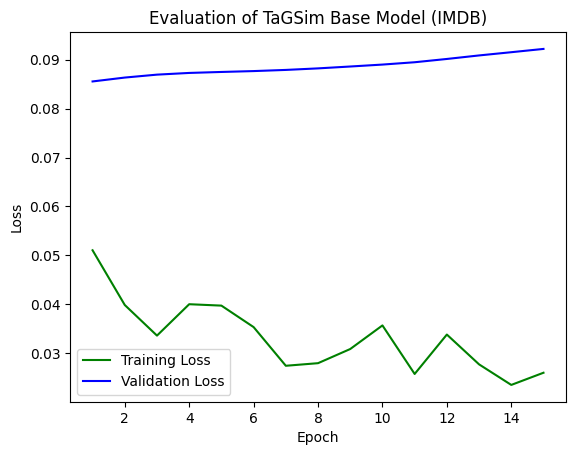


-------Model testing---------.


Model test error: 0.10159691495355219


In [7]:
import torch
import numpy as np


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, tensor_neurons, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.input_dim = input_dim
        self.tensor_neurons = tensor_neurons
        self.setup_weights()
        self.init_parameters()

    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(torch.Tensor(self.input_dim, self.input_dim, self.tensor_neurons))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.tensor_neurons)
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


def graph_aggregation_layer(input, adj):
    result = torch.mm(adj, input)
    return result


class TaGSim(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim, self).__init__()
        self.number_of_node_labels = len(number_of_node_labels)
        self.number_of_edge_labels = len(number_of_edge_labels)
        self.node_type = number_of_node_labels
        self.edge_type = number_of_edge_labels
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.setup_layers()

    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_edge_labels)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)

        return hidden1, hidden2

    def forward(self, label_multiset):
        adj_1, adj_2 = torch.FloatTensor(np.array(label_multiset["node_index_1"].todense())), torch.FloatTensor(
            np.array(label_multiset["node_index_2"].todense()))
        edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
        node_features_1, node_features_2 = label_multiset["node_features_1"], label_multiset["node_features_2"]
        edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

        #gal
        graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, node_features_1)  #original graph node
        graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, node_features_2)  #generated graph node
        edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
        edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge
        #node level embedding Concatenation
        graph1_01concat = torch.cat([node_features_1, graph1_hidden1], dim=1)
        graph2_01concat = torch.cat([node_features_2, graph2_hidden1], dim=1)
        graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
        graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)
        #graph pooling: node Sum
        graph1_01pooled = torch.sum(graph1_01concat, dim=0).unsqueeze(1)
        graph2_01pooled = torch.sum(graph2_01concat, dim=0).unsqueeze(1)
        graph1_12pooled = torch.sum(graph1_12concat, dim=0).unsqueeze(1)
        graph2_12pooled = torch.sum(graph2_12concat, dim=0).unsqueeze(1)
        #edge level embedding Concatenation
        edge1_01concat = torch.cat([edge_features_1, edge1_hidden1], dim=1)
        edge2_01concat = torch.cat([edge_features_2, edge2_hidden1], dim=1)
        #graph pooling: edge Sum
        edge1_01pooled = torch.sum(edge1_01concat, dim=0).unsqueeze(1)
        edge2_01pooled = torch.sum(edge2_01concat, dim=0).unsqueeze(1)

        # scores_nc = self.tensor_network_nc(graph1_01pooled, graph2_01pooled)
        # scores_nc = torch.t(scores_nc)
        #
        # scores_nc = torch.nn.functional.relu(self.fully_connected_first_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_second_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_third_nc(scores_nc))
        # score_nc = torch.sigmoid(self.scoring_layer_nc(scores_nc))

        scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
        scores_in = torch.t(scores_in)

        scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
        score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

        # scores_ie = self.tensor_network_ie(graph1_12pooled, graph2_12pooled)
        # scores_ie = torch.t(scores_ie)
        #
        # scores_ie = torch.nn.functional.relu(self.fully_connected_first_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_second_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_third_ie(scores_ie))
        # score_ie = torch.sigmoid(self.scoring_layer_ie(scores_ie))

        scores_ec = self.tensor_network_ec(edge1_01pooled, edge2_01pooled)
        scores_ec = torch.t(scores_ec)

        scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
        score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

        return torch.cat([ score_in,  score_ec], dim=1)

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']
        #node and edge info of pair graph
        node_info1 = nx.get_node_attributes(graph1, 'label')
        node_info2 = nx.get_node_attributes(graph2, 'label')
        edge_info1 = nx.get_edge_attributes(graph1, 'id')
        edge_info2 = nx.get_edge_attributes(graph2, 'id')
        nodes1 = list(graph1.nodes())
        nodes2 = list(graph2.nodes())
        edges1 = list(graph1.edges())
        edges2 = list(graph2.edges())

        label_multiset = dict()
        node_features_1, node_features_2, edge_features_1, edge_features_2, edge_adj_1, edge_adj_2 = [], [], [], [], [], []

        for i in graph1.nodes():
            node_features_1.append([1.0 if node_info1[i] == node else 0.0 for node in self.node_type])
        for i in graph2.nodes():
            node_features_2.append([1.0 if node_info2[i] == node else 0.0 for node in self.node_type])
        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        for i in edges1:
            edge_features_1.append([1.0 if edge_info1[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges1:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_1.append(adj_row)
        for i in edges2:
            edge_features_2.append([1.0 if edge_info2[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges2:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_2.append(adj_row)
        edge_features_1, edge_features_2 = torch.FloatTensor(np.array(edge_features_1)), torch.FloatTensor(
            np.array(edge_features_2))
        edge_adj_1, edge_adj_2 = torch.FloatTensor(np.array(edge_adj_1)), torch.FloatTensor(np.array(edge_adj_2))

        label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
            graph1), nx.adjacency_matrix(graph2)
        label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (len(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset


import matplotlib.pyplot as plt

epochs = 15
tensor_neurons = 16
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.0
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
test_scores = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []

#model training
for epoch in range(epochs):
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))
    # testing
    model.eval()
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)

#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Loss')
plt.title('Evaluation of TaGSim Base Model (' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))

NO NID


-------Model training---------.



E:\AppData\Local\Temp\ipykernel_7428\3730542866.py:198: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
E:\AppData\Local\Temp\ipykernel_7428\3730542866.py:199: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  graph1), nx.adjacency_matrix(graph2)
E:\AppData\Local\Temp\ipykernel_7428\3730542866.py:261: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  losses += torch.nn.functional.mse_loss(data["target"], prediction)


Iteration 0 loss:  0.05084655061364174
Iteration 1 loss:  0.04255601018667221
Iteration 2 loss:  0.043702419847249985
Iteration 3 loss:  0.04032013192772865
Iteration 4 loss:  0.040849719196558
Iteration 5 loss:  0.035125989466905594
Iteration 6 loss:  0.03678445518016815
Iteration 7 loss:  0.035033900290727615
Iteration 8 loss:  0.03777036815881729
Iteration 9 loss:  0.0433165580034256
Iteration 10 loss:  0.033779412508010864
Iteration 11 loss:  0.030463609844446182
Iteration 12 loss:  0.032961949706077576
Iteration 13 loss:  0.03428666293621063
Iteration 14 loss:  0.036240097135305405
Iteration 15 loss:  0.03466632217168808
Iteration 16 loss:  0.03434452414512634
Iteration 17 loss:  0.03023693710565567
Iteration 18 loss:  0.03588514402508736
Iteration 19 loss:  0.0287861426671346
Iteration 20 loss:  0.033159997314214706
Iteration 21 loss:  0.034775473177433014
Iteration 22 loss:  0.03617846220731735
Iteration 23 loss:  0.03494143486022949
Iteration 24 loss:  0.03148351237177849
Itera

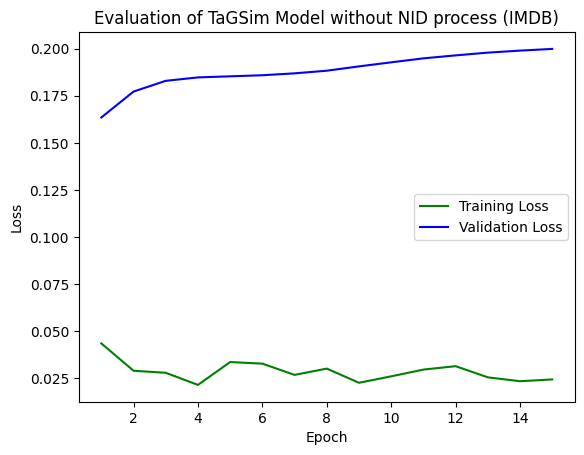


-------Model testing---------.


Model test error: 0.2124568137774865


In [8]:
import torch
import numpy as np


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, tensor_neurons, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.input_dim = input_dim
        self.tensor_neurons = tensor_neurons
        self.setup_weights()
        self.init_parameters()

    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(torch.Tensor(self.input_dim, self.input_dim, self.tensor_neurons))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.tensor_neurons)
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


def graph_aggregation_layer(input, adj):
    result = torch.mm(adj, input)
    return result


class TaGSim(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim, self).__init__()
        self.number_of_node_labels = len(number_of_node_labels)
        self.number_of_edge_labels = len(number_of_edge_labels)
        self.node_type = number_of_node_labels
        self.edge_type = number_of_edge_labels
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.setup_layers()

    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        # self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_edge_labels)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        # self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_in = torch.nn.Linear(8, 4)
        # self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)

        return hidden1, hidden2

    def forward(self, label_multiset):
        adj_1, adj_2 = torch.FloatTensor(np.array(label_multiset["node_index_1"].todense())), torch.FloatTensor(
            np.array(label_multiset["node_index_2"].todense()))
        edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
        node_features_1, node_features_2 = label_multiset["node_features_1"], label_multiset["node_features_2"]
        edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

        #gal
        graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, node_features_1)  #original graph node
        graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, node_features_2)  #generated graph node
        edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
        edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge
        #node level embedding Concatenation
        graph1_01concat = torch.cat([node_features_1, graph1_hidden1], dim=1)
        graph2_01concat = torch.cat([node_features_2, graph2_hidden1], dim=1)
        graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
        graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)
        #graph pooling: node Sum
        graph1_01pooled = torch.sum(graph1_01concat, dim=0).unsqueeze(1)
        graph2_01pooled = torch.sum(graph2_01concat, dim=0).unsqueeze(1)
        graph1_12pooled = torch.sum(graph1_12concat, dim=0).unsqueeze(1)
        graph2_12pooled = torch.sum(graph2_12concat, dim=0).unsqueeze(1)
        #edge level embedding Concatenation
        edge1_01concat = torch.cat([edge_features_1, edge1_hidden1], dim=1)
        edge2_01concat = torch.cat([edge_features_2, edge2_hidden1], dim=1)
        #graph pooling: edge Sum
        edge1_01pooled = torch.sum(edge1_01concat, dim=0).unsqueeze(1)
        edge2_01pooled = torch.sum(edge2_01concat, dim=0).unsqueeze(1)

        # scores_nc = self.tensor_network_nc(graph1_01pooled, graph2_01pooled)
        # scores_nc = torch.t(scores_nc)
        #
        # scores_nc = torch.nn.functional.relu(self.fully_connected_first_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_second_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_third_nc(scores_nc))
        # score_nc = torch.sigmoid(self.scoring_layer_nc(scores_nc))

        # scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
        # scores_in = torch.t(scores_in)
        #
        # scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
        # scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
        # scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
        # score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

        # scores_ie = self.tensor_network_ie(graph1_12pooled, graph2_12pooled)
        # scores_ie = torch.t(scores_ie)
        #
        # scores_ie = torch.nn.functional.relu(self.fully_connected_first_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_second_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_third_ie(scores_ie))
        # score_ie = torch.sigmoid(self.scoring_layer_ie(scores_ie))

        scores_ec = self.tensor_network_ec(edge1_01pooled, edge2_01pooled)
        scores_ec = torch.t(scores_ec)

        scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
        score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

        return torch.cat([score_ec], dim=1)

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']
        #node and edge info of pair graph
        node_info1 = nx.get_node_attributes(graph1, 'label')
        node_info2 = nx.get_node_attributes(graph2, 'label')
        edge_info1 = nx.get_edge_attributes(graph1, 'id')
        edge_info2 = nx.get_edge_attributes(graph2, 'id')
        nodes1 = list(graph1.nodes())
        nodes2 = list(graph2.nodes())
        edges1 = list(graph1.edges())
        edges2 = list(graph2.edges())

        label_multiset = dict()
        node_features_1, node_features_2, edge_features_1, edge_features_2, edge_adj_1, edge_adj_2 = [], [], [], [], [], []

        for i in graph1.nodes():
            node_features_1.append([1.0 if node_info1[i] == node else 0.0 for node in self.node_type])
        for i in graph2.nodes():
            node_features_2.append([1.0 if node_info2[i] == node else 0.0 for node in self.node_type])
        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        for i in edges1:
            edge_features_1.append([1.0 if edge_info1[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges1:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_1.append(adj_row)
        for i in edges2:
            edge_features_2.append([1.0 if edge_info2[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges2:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_2.append(adj_row)
        edge_features_1, edge_features_2 = torch.FloatTensor(np.array(edge_features_1)), torch.FloatTensor(
            np.array(edge_features_2))
        edge_adj_1, edge_adj_2 = torch.FloatTensor(np.array(edge_adj_1)), torch.FloatTensor(np.array(edge_adj_2))

        label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
            graph1), nx.adjacency_matrix(graph2)
        label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (len(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset


import matplotlib.pyplot as plt

epochs = 15
tensor_neurons = 16
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.0
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
test_scores = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []

#model training
for epoch in range(epochs):
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))
    # testing
    model.eval()
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)

#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Loss')
plt.title('Evaluation of TaGSim Model without NID process (' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))

SUM Pooling


-------Model training---------.



E:\AppData\Local\Temp\ipykernel_2368\3736647721.py:198: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
E:\AppData\Local\Temp\ipykernel_2368\3736647721.py:199: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  graph1), nx.adjacency_matrix(graph2)


Iteration 0 loss:  0.05807678401470184
Iteration 1 loss:  0.053802717477083206
Iteration 2 loss:  0.04760007932782173
Iteration 3 loss:  0.04629005119204521
Iteration 4 loss:  0.0419185571372509
Iteration 5 loss:  0.03997514024376869
Iteration 6 loss:  0.038000304251909256
Iteration 7 loss:  0.04029619321227074
Iteration 8 loss:  0.03769231215119362
Iteration 9 loss:  0.04053726543982824
Iteration 10 loss:  0.037010062485933304
Iteration 11 loss:  0.035889532417058945
Iteration 12 loss:  0.03690853342413902
Iteration 13 loss:  0.04228358715772629
Iteration 14 loss:  0.03201622515916824
Iteration 15 loss:  0.035410426557064056
Iteration 16 loss:  0.03526176139712334
Iteration 17 loss:  0.03659946471452713
Iteration 18 loss:  0.03579102084040642
Iteration 19 loss:  0.031122041245301563
Iteration 20 loss:  0.036860961467027664
Iteration 21 loss:  0.03509926795959473
Iteration 22 loss:  0.03183351829648018
Iteration 23 loss:  0.037199847400188446
Iteration 24 loss:  0.031679727137088776
It

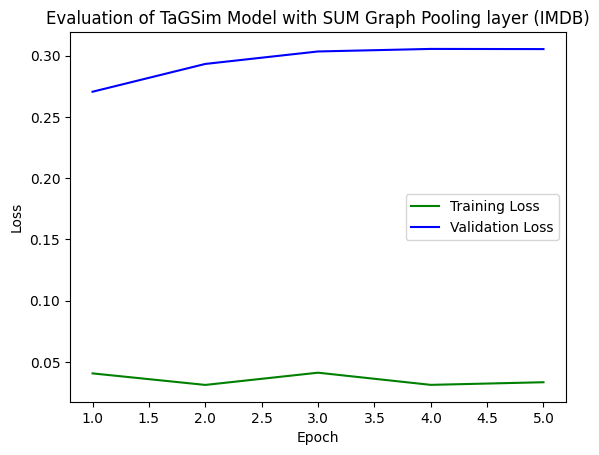


-------Model testing---------.


Model test error: 0.3048916791166578


In [102]:
import torch
import numpy as np


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, tensor_neurons, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.input_dim = input_dim
        self.tensor_neurons = tensor_neurons
        self.setup_weights()
        self.init_parameters()

    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(torch.Tensor(self.input_dim, self.input_dim, self.tensor_neurons))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.tensor_neurons)
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


def graph_aggregation_layer(input, adj):
    result = torch.mm(adj, input)
    return result


class TaGSim(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim, self).__init__()
        self.number_of_node_labels = len(number_of_node_labels)
        self.number_of_edge_labels = len(number_of_edge_labels)
        self.node_type = number_of_node_labels
        self.edge_type = number_of_edge_labels
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.setup_layers()

    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_edge_labels)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)

        return hidden1, hidden2

    def forward(self, label_multiset):
        adj_1, adj_2 = torch.FloatTensor(np.array(label_multiset["node_index_1"].todense())), torch.FloatTensor(
            np.array(label_multiset["node_index_2"].todense()))
        edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
        node_features_1, node_features_2 = label_multiset["node_features_1"], label_multiset["node_features_2"]
        edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

        #gal
        graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, node_features_1)  #original graph node
        graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, node_features_2)  #generated graph node
        edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
        edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge
        #node level embedding Concatenation
        graph1_01concat = torch.cat([node_features_1, graph1_hidden1], dim=1)
        graph2_01concat = torch.cat([node_features_2, graph2_hidden1], dim=1)
        graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
        graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)
        #graph pooling: node Sum
        graph1_01pooled = torch.sum(graph1_01concat, dim=0).unsqueeze(1)
        graph2_01pooled = torch.sum(graph2_01concat, dim=0).unsqueeze(1)
        graph1_12pooled = torch.sum(graph1_12concat, dim=0).unsqueeze(1)
        graph2_12pooled = torch.sum(graph2_12concat, dim=0).unsqueeze(1)
        #edge level embedding Concatenation
        edge1_01concat = torch.cat([edge_features_1, edge1_hidden1], dim=1)
        edge2_01concat = torch.cat([edge_features_2, edge2_hidden1], dim=1)
        #graph pooling: edge Sum
        edge1_01pooled = torch.sum(edge1_01concat, dim=0).unsqueeze(1)
        edge2_01pooled = torch.sum(edge2_01concat, dim=0).unsqueeze(1)

        # scores_nc = self.tensor_network_nc(graph1_01pooled, graph2_01pooled)
        # scores_nc = torch.t(scores_nc)
        #
        # scores_nc = torch.nn.functional.relu(self.fully_connected_first_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_second_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_third_nc(scores_nc))
        # score_nc = torch.sigmoid(self.scoring_layer_nc(scores_nc))

        scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
        scores_in = torch.t(scores_in)

        scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
        score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

        # scores_ie = self.tensor_network_ie(graph1_12pooled, graph2_12pooled)
        # scores_ie = torch.t(scores_ie)
        #
        # scores_ie = torch.nn.functional.relu(self.fully_connected_first_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_second_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_third_ie(scores_ie))
        # score_ie = torch.sigmoid(self.scoring_layer_ie(scores_ie))

        scores_ec = self.tensor_network_ec(edge1_01pooled, edge2_01pooled)
        scores_ec = torch.t(scores_ec)

        scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
        score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

        return torch.cat([ score_in,  score_ec], dim=1)

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']
        #node and edge info of pair graph
        node_info1 = nx.get_node_attributes(graph1, 'label')
        node_info2 = nx.get_node_attributes(graph2, 'label')
        edge_info1 = nx.get_edge_attributes(graph1, 'id')
        edge_info2 = nx.get_edge_attributes(graph2, 'id')
        nodes1 = list(graph1.nodes())
        nodes2 = list(graph2.nodes())
        edges1 = list(graph1.edges())
        edges2 = list(graph2.edges())

        label_multiset = dict()
        node_features_1, node_features_2, edge_features_1, edge_features_2, edge_adj_1, edge_adj_2 = [], [], [], [], [], []

        for i in graph1.nodes():
            node_features_1.append([1.0 if node_info1[i] == node else 0.0 for node in self.node_type])
        for i in graph2.nodes():
            node_features_2.append([1.0 if node_info2[i] == node else 0.0 for node in self.node_type])
        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        for i in edges1:
            edge_features_1.append([1.0 if edge_info1[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges1:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_1.append(adj_row)
        for i in edges2:
            edge_features_2.append([1.0 if edge_info2[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges2:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_2.append(adj_row)
        edge_features_1, edge_features_2 = torch.FloatTensor(np.array(edge_features_1)), torch.FloatTensor(
            np.array(edge_features_2))
        edge_adj_1, edge_adj_2 = torch.FloatTensor(np.array(edge_adj_1)), torch.FloatTensor(np.array(edge_adj_2))

        label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
            graph1), nx.adjacency_matrix(graph2)
        label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (len(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset


import matplotlib.pyplot as plt

epochs = 5
tensor_neurons = 16
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.0
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
test_scores = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []

#model training
for epoch in range(epochs):
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))
    # testing
    model.eval()
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)

#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Loss')
plt.title('Evaluation of TaGSim Model with SUM Graph Pooling layer (' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))

MAX Pooling


-------Model training---------.



E:\AppData\Local\Temp\ipykernel_2368\1979523846.py:206: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
E:\AppData\Local\Temp\ipykernel_2368\1979523846.py:207: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  graph1), nx.adjacency_matrix(graph2)


Iteration 0 loss:  0.18955859541893005
Iteration 1 loss:  0.19416505098342896
Iteration 2 loss:  0.18506695330142975
Iteration 3 loss:  0.19085198640823364
Iteration 4 loss:  0.18415845930576324
Iteration 5 loss:  0.18449288606643677
Iteration 6 loss:  0.18295766413211823
Iteration 7 loss:  0.18021006882190704
Iteration 8 loss:  0.1833319514989853
Iteration 9 loss:  0.17708736658096313
Iteration 10 loss:  0.17781296372413635
Iteration 11 loss:  0.17751652002334595
Iteration 12 loss:  0.17869819700717926
Iteration 13 loss:  0.17356529831886292
Iteration 14 loss:  0.17610935866832733
Iteration 15 loss:  0.17470382153987885
Iteration 16 loss:  0.17438238859176636
Iteration 17 loss:  0.1751643419265747
Iteration 18 loss:  0.16953067481517792
Iteration 19 loss:  0.16024282574653625
Iteration 20 loss:  0.1664147973060608
Iteration 21 loss:  0.16062334179878235
Iteration 22 loss:  0.1720435470342636
Iteration 23 loss:  0.16552048921585083
Iteration 24 loss:  0.15950366854667664
Iteration 25 l

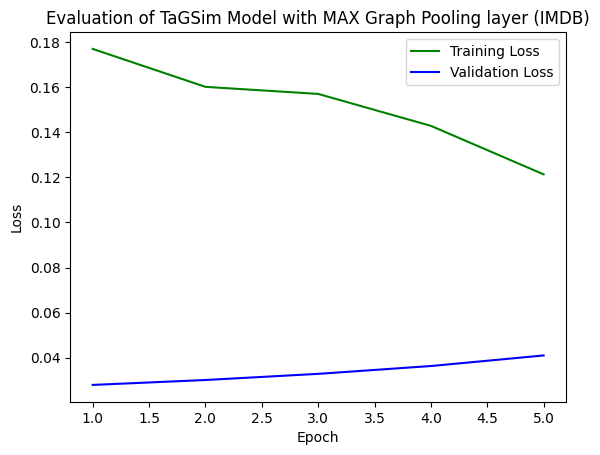


-------Model testing---------.


Model test error: 0.059704834169575144


In [108]:
import torch
import numpy as np


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, tensor_neurons, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.input_dim = input_dim
        self.tensor_neurons = tensor_neurons
        self.setup_weights()
        self.init_parameters()

    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(torch.Tensor(self.input_dim, self.input_dim, self.tensor_neurons))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.tensor_neurons)
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


def graph_aggregation_layer(input, adj):
    result = torch.mm(adj, input)
    return result


class TaGSim(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim, self).__init__()
        self.number_of_node_labels = len(number_of_node_labels)
        self.number_of_edge_labels = len(number_of_edge_labels)
        self.node_type = number_of_node_labels
        self.edge_type = number_of_edge_labels
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.setup_layers()

    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_edge_labels)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)

        return hidden1, hidden2

    def forward(self, label_multiset):
        adj_1, adj_2 = torch.FloatTensor(np.array(label_multiset["node_index_1"].todense())), torch.FloatTensor(
            np.array(label_multiset["node_index_2"].todense()))
        edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
        node_features_1, node_features_2 = label_multiset["node_features_1"], label_multiset["node_features_2"]
        edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

        #gal
        graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, node_features_1)  #original graph node
        graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, node_features_2)  #generated graph node
        edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
        edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge
        #node level embedding Concatenation
        graph1_01concat = torch.cat([node_features_1, graph1_hidden1], dim=1)
        graph2_01concat = torch.cat([node_features_2, graph2_hidden1], dim=1)
        graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
        graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)
        #graph pooling: node Sum
        graph1_01pooled, max_idxs = torch.max(graph1_01concat, 0)
        graph2_01pooled, max_idxs = torch.max(graph2_01concat, 0)
        graph1_12pooled, max_idxs = torch.max(graph1_12concat, 0)
        graph2_12pooled, max_idxs = torch.max(graph2_12concat, 0)

        graph1_01pooled = torch.unsqueeze(graph1_01pooled, 1)
        graph2_01pooled = torch.unsqueeze(graph2_01pooled, 1)
        graph1_12pooled = torch.unsqueeze(graph1_12pooled, 1)
        graph2_12pooled = torch.unsqueeze(graph2_12pooled, 1)

        #edge level embedding Concatenation
        edge1_01concat = torch.cat([edge_features_1, edge1_hidden1], dim=1)
        edge2_01concat = torch.cat([edge_features_2, edge2_hidden1], dim=1)
        #graph pooling: edge Sum
        edge1_01pooled, max_idxs = torch.max(edge1_01concat, 0)
        edge2_01pooled, max_idxs = torch.max(edge2_01concat, 0)
        edge1_01pooled = torch.unsqueeze(edge1_01pooled, 1)
        edge2_01pooled = torch.unsqueeze(edge2_01pooled, 1)

        # scores_nc = self.tensor_network_nc(graph1_01pooled, graph2_01pooled)
        # scores_nc = torch.t(scores_nc)
        #
        # scores_nc = torch.nn.functional.relu(self.fully_connected_first_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_second_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_third_nc(scores_nc))
        # score_nc = torch.sigmoid(self.scoring_layer_nc(scores_nc))

        scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
        scores_in = torch.t(scores_in)

        scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
        score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

        # scores_ie = self.tensor_network_ie(graph1_12pooled, graph2_12pooled)
        # scores_ie = torch.t(scores_ie)
        #
        # scores_ie = torch.nn.functional.relu(self.fully_connected_first_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_second_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_third_ie(scores_ie))
        # score_ie = torch.sigmoid(self.scoring_layer_ie(scores_ie))

        scores_ec = self.tensor_network_ec(edge1_01pooled, edge2_01pooled)
        scores_ec = torch.t(scores_ec)

        scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
        score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

        return torch.cat([ score_in,  score_ec], dim=1)

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']
        #node and edge info of pair graph
        node_info1 = nx.get_node_attributes(graph1, 'label')
        node_info2 = nx.get_node_attributes(graph2, 'label')
        edge_info1 = nx.get_edge_attributes(graph1, 'id')
        edge_info2 = nx.get_edge_attributes(graph2, 'id')
        nodes1 = list(graph1.nodes())
        nodes2 = list(graph2.nodes())
        edges1 = list(graph1.edges())
        edges2 = list(graph2.edges())

        label_multiset = dict()
        node_features_1, node_features_2, edge_features_1, edge_features_2, edge_adj_1, edge_adj_2 = [], [], [], [], [], []

        for i in graph1.nodes():
            node_features_1.append([1.0 if node_info1[i] == node else 0.0 for node in self.node_type])
        for i in graph2.nodes():
            node_features_2.append([1.0 if node_info2[i] == node else 0.0 for node in self.node_type])
        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        for i in edges1:
            edge_features_1.append([1.0 if edge_info1[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges1:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_1.append(adj_row)
        for i in edges2:
            edge_features_2.append([1.0 if edge_info2[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges2:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_2.append(adj_row)
        edge_features_1, edge_features_2 = torch.FloatTensor(np.array(edge_features_1)), torch.FloatTensor(
            np.array(edge_features_2))
        edge_adj_1, edge_adj_2 = torch.FloatTensor(np.array(edge_adj_1)), torch.FloatTensor(np.array(edge_adj_2))

        label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
            graph1), nx.adjacency_matrix(graph2)
        label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (len(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset


import matplotlib.pyplot as plt

epochs = 5
tensor_neurons = 16
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.0
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
test_scores = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []

#model training
for epoch in range(epochs):
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))
    # testing
    model.eval()
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)

#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Loss')
plt.title('Evaluation of TaGSim Model with MAX Graph Pooling layer (' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))

MIN Pooling


-------Model training---------.



E:\AppData\Local\Temp\ipykernel_2368\2289132356.py:206: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
E:\AppData\Local\Temp\ipykernel_2368\2289132356.py:207: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  graph1), nx.adjacency_matrix(graph2)


Iteration 0 loss:  0.18090474605560303
Iteration 1 loss:  0.18461918830871582
Iteration 2 loss:  0.17894986271858215
Iteration 3 loss:  0.18107962608337402
Iteration 4 loss:  0.17674225568771362
Iteration 5 loss:  0.17422857880592346
Iteration 6 loss:  0.17586112022399902
Iteration 7 loss:  0.17905470728874207
Iteration 8 loss:  0.1769426017999649
Iteration 9 loss:  0.17398500442504883
Iteration 10 loss:  0.1761506199836731
Iteration 11 loss:  0.1734376698732376
Iteration 12 loss:  0.17530612647533417
Iteration 13 loss:  0.16597183048725128
Iteration 14 loss:  0.17122267186641693
Iteration 15 loss:  0.17365716397762299
Iteration 16 loss:  0.17279531061649323
Iteration 17 loss:  0.17075517773628235
Iteration 18 loss:  0.16825611889362335
Iteration 19 loss:  0.17314795653025308
Iteration 20 loss:  0.16971401870250702
Iteration 21 loss:  0.16764584183692932
Iteration 22 loss:  0.16440479457378387
Iteration 23 loss:  0.16580821573734283
Iteration 24 loss:  0.16684234142303467
Iteration 25 

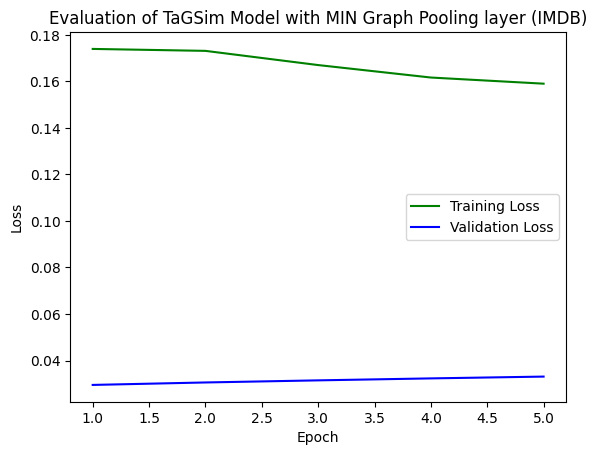


-------Model testing---------.


Model test error: 0.03618227176900421


In [109]:
import torch
import numpy as np


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, tensor_neurons, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.input_dim = input_dim
        self.tensor_neurons = tensor_neurons
        self.setup_weights()
        self.init_parameters()

    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(torch.Tensor(self.input_dim, self.input_dim, self.tensor_neurons))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.tensor_neurons)
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


def graph_aggregation_layer(input, adj):
    result = torch.mm(adj, input)
    return result


class TaGSim(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim, self).__init__()
        self.number_of_node_labels = len(number_of_node_labels)
        self.number_of_edge_labels = len(number_of_edge_labels)
        self.node_type = number_of_node_labels
        self.edge_type = number_of_edge_labels
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.setup_layers()

    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_edge_labels)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)

        return hidden1, hidden2

    def forward(self, label_multiset):
        adj_1, adj_2 = torch.FloatTensor(np.array(label_multiset["node_index_1"].todense())), torch.FloatTensor(
            np.array(label_multiset["node_index_2"].todense()))
        edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
        node_features_1, node_features_2 = label_multiset["node_features_1"], label_multiset["node_features_2"]
        edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

        #gal
        graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, node_features_1)  #original graph node
        graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, node_features_2)  #generated graph node
        edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
        edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge
        #node level embedding Concatenation
        graph1_01concat = torch.cat([node_features_1, graph1_hidden1], dim=1)
        graph2_01concat = torch.cat([node_features_2, graph2_hidden1], dim=1)
        graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
        graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)
        #graph pooling: node Sum
        graph1_01pooled, min_idxs = torch.min(graph1_01concat, 0)
        graph2_01pooled, min_idxs = torch.min(graph2_01concat, 0)
        graph1_12pooled, min_idxs = torch.min(graph1_12concat, 0)
        graph2_12pooled, min_idxs = torch.min(graph2_12concat, 0)

        graph1_01pooled = torch.unsqueeze(graph1_01pooled, 1)
        graph2_01pooled = torch.unsqueeze(graph2_01pooled, 1)
        graph1_12pooled = torch.unsqueeze(graph1_12pooled, 1)
        graph2_12pooled = torch.unsqueeze(graph2_12pooled, 1)

        #edge level embedding Concatenation
        edge1_01concat = torch.cat([edge_features_1, edge1_hidden1], dim=1)
        edge2_01concat = torch.cat([edge_features_2, edge2_hidden1], dim=1)
        #graph pooling: edge Sum
        edge1_01pooled, min_idxs = torch.min(edge1_01concat, 0)
        edge2_01pooled, min_idxs = torch.min(edge2_01concat, 0)
        edge1_01pooled = torch.unsqueeze(edge1_01pooled, 1)
        edge2_01pooled = torch.unsqueeze(edge2_01pooled, 1)

        # scores_nc = self.tensor_network_nc(graph1_01pooled, graph2_01pooled)
        # scores_nc = torch.t(scores_nc)
        #
        # scores_nc = torch.nn.functional.relu(self.fully_connected_first_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_second_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_third_nc(scores_nc))
        # score_nc = torch.sigmoid(self.scoring_layer_nc(scores_nc))

        scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
        scores_in = torch.t(scores_in)

        scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
        score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

        # scores_ie = self.tensor_network_ie(graph1_12pooled, graph2_12pooled)
        # scores_ie = torch.t(scores_ie)
        #
        # scores_ie = torch.nn.functional.relu(self.fully_connected_first_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_second_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_third_ie(scores_ie))
        # score_ie = torch.sigmoid(self.scoring_layer_ie(scores_ie))

        scores_ec = self.tensor_network_ec(edge1_01pooled, edge2_01pooled)
        scores_ec = torch.t(scores_ec)

        scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
        score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

        return torch.cat([ score_in,  score_ec], dim=1)

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']
        #node and edge info of pair graph
        node_info1 = nx.get_node_attributes(graph1, 'label')
        node_info2 = nx.get_node_attributes(graph2, 'label')
        edge_info1 = nx.get_edge_attributes(graph1, 'id')
        edge_info2 = nx.get_edge_attributes(graph2, 'id')
        nodes1 = list(graph1.nodes())
        nodes2 = list(graph2.nodes())
        edges1 = list(graph1.edges())
        edges2 = list(graph2.edges())

        label_multiset = dict()
        node_features_1, node_features_2, edge_features_1, edge_features_2, edge_adj_1, edge_adj_2 = [], [], [], [], [], []

        for i in graph1.nodes():
            node_features_1.append([1.0 if node_info1[i] == node else 0.0 for node in self.node_type])
        for i in graph2.nodes():
            node_features_2.append([1.0 if node_info2[i] == node else 0.0 for node in self.node_type])
        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        for i in edges1:
            edge_features_1.append([1.0 if edge_info1[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges1:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_1.append(adj_row)
        for i in edges2:
            edge_features_2.append([1.0 if edge_info2[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges2:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_2.append(adj_row)
        edge_features_1, edge_features_2 = torch.FloatTensor(np.array(edge_features_1)), torch.FloatTensor(
            np.array(edge_features_2))
        edge_adj_1, edge_adj_2 = torch.FloatTensor(np.array(edge_adj_1)), torch.FloatTensor(np.array(edge_adj_2))

        label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
            graph1), nx.adjacency_matrix(graph2)
        label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (len(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset


import matplotlib.pyplot as plt

epochs = 5
tensor_neurons = 16
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.0
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
test_scores = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []

#model training
for epoch in range(epochs):
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))
    # testing
    model.eval()
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)

#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Loss')
plt.title('Evaluation of TaGSim Model with MIN Graph Pooling layer (' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))

MEAN Pooling


-------Model training---------.



E:\AppData\Local\Temp\ipykernel_2368\1131682805.py:206: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
E:\AppData\Local\Temp\ipykernel_2368\1131682805.py:207: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  graph1), nx.adjacency_matrix(graph2)


Iteration 0 loss:  0.14561547338962555
Iteration 1 loss:  0.14077311754226685
Iteration 2 loss:  0.144089013338089
Iteration 3 loss:  0.14316433668136597
Iteration 4 loss:  0.14515970647335052
Iteration 5 loss:  0.13927698135375977
Iteration 6 loss:  0.14451749622821808
Iteration 7 loss:  0.13758379220962524
Iteration 8 loss:  0.1387508064508438
Iteration 9 loss:  0.14070777098337808
Iteration 10 loss:  0.14267292618751526
Iteration 11 loss:  0.13943356275558472
Iteration 12 loss:  0.13780348002910614
Iteration 13 loss:  0.1407552808523178
Iteration 14 loss:  0.13708309829235077
Iteration 15 loss:  0.1361829787492752
Iteration 16 loss:  0.13613395392894745
Iteration 17 loss:  0.13234147429466248
Iteration 18 loss:  0.13430337607860565
Iteration 19 loss:  0.13324832916259766
Iteration 20 loss:  0.13951009511947632
Iteration 21 loss:  0.13565628230571747
Iteration 22 loss:  0.13516294956207275
Iteration 23 loss:  0.1291392594575882
Iteration 24 loss:  0.13214325904846191
Iteration 25 los

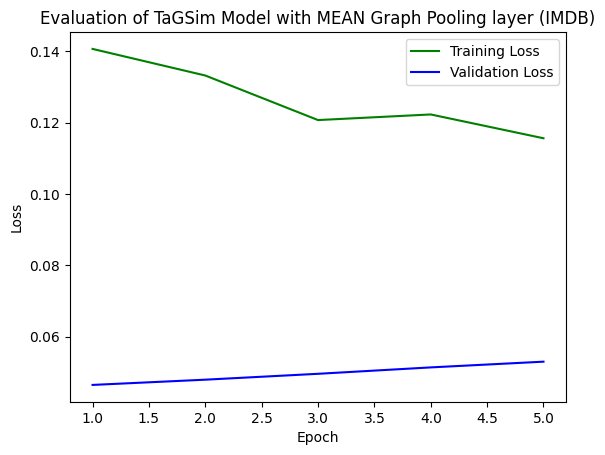


-------Model testing---------.


Model test error: 0.05938835058893476


In [110]:
import torch
import numpy as np


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, tensor_neurons, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.input_dim = input_dim
        self.tensor_neurons = tensor_neurons
        self.setup_weights()
        self.init_parameters()

    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(torch.Tensor(self.input_dim, self.input_dim, self.tensor_neurons))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.tensor_neurons)
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


def graph_aggregation_layer(input, adj):
    result = torch.mm(adj, input)
    return result


class TaGSim(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim, self).__init__()
        self.number_of_node_labels = len(number_of_node_labels)
        self.number_of_edge_labels = len(number_of_edge_labels)
        self.node_type = number_of_node_labels
        self.edge_type = number_of_edge_labels
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.setup_layers()

    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_edge_labels)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)

        return hidden1, hidden2

    def forward(self, label_multiset):
        adj_1, adj_2 = torch.FloatTensor(np.array(label_multiset["node_index_1"].todense())), torch.FloatTensor(
            np.array(label_multiset["node_index_2"].todense()))
        edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
        node_features_1, node_features_2 = label_multiset["node_features_1"], label_multiset["node_features_2"]
        edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

        #gal
        graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, node_features_1)  #original graph node
        graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, node_features_2)  #generated graph node
        edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
        edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge
        #node level embedding Concatenation
        graph1_01concat = torch.cat([node_features_1, graph1_hidden1], dim=1)
        graph2_01concat = torch.cat([node_features_2, graph2_hidden1], dim=1)
        graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
        graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)
        #graph pooling: node Mean
        graph1_01pooled = torch.mean(graph1_01concat, 0)
        graph2_01pooled = torch.mean(graph2_01concat, 0)
        graph1_12pooled = torch.mean(graph1_12concat, 0)
        graph2_12pooled = torch.mean(graph2_12concat, 0)

        graph1_01pooled = torch.unsqueeze(graph1_01pooled, 1)
        graph2_01pooled = torch.unsqueeze(graph2_01pooled, 1)
        graph1_12pooled = torch.unsqueeze(graph1_12pooled, 1)
        graph2_12pooled = torch.unsqueeze(graph2_12pooled, 1)

        #edge level embedding Concatenation
        edge1_01concat = torch.cat([edge_features_1, edge1_hidden1], dim=1)
        edge2_01concat = torch.cat([edge_features_2, edge2_hidden1], dim=1)
        #graph pooling: edge Mean
        edge1_01pooled = torch.mean(edge1_01concat, 0)
        edge2_01pooled = torch.mean(edge2_01concat, 0)
        edge1_01pooled = torch.unsqueeze(edge1_01pooled, 1)
        edge2_01pooled = torch.unsqueeze(edge2_01pooled, 1)

        # scores_nc = self.tensor_network_nc(graph1_01pooled, graph2_01pooled)
        # scores_nc = torch.t(scores_nc)
        #
        # scores_nc = torch.nn.functional.relu(self.fully_connected_first_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_second_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_third_nc(scores_nc))
        # score_nc = torch.sigmoid(self.scoring_layer_nc(scores_nc))

        scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
        scores_in = torch.t(scores_in)

        scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
        score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

        # scores_ie = self.tensor_network_ie(graph1_12pooled, graph2_12pooled)
        # scores_ie = torch.t(scores_ie)
        #
        # scores_ie = torch.nn.functional.relu(self.fully_connected_first_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_second_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_third_ie(scores_ie))
        # score_ie = torch.sigmoid(self.scoring_layer_ie(scores_ie))

        scores_ec = self.tensor_network_ec(edge1_01pooled, edge2_01pooled)
        scores_ec = torch.t(scores_ec)

        scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
        score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

        return torch.cat([ score_in,  score_ec], dim=1)

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']
        #node and edge info of pair graph
        node_info1 = nx.get_node_attributes(graph1, 'label')
        node_info2 = nx.get_node_attributes(graph2, 'label')
        edge_info1 = nx.get_edge_attributes(graph1, 'id')
        edge_info2 = nx.get_edge_attributes(graph2, 'id')
        nodes1 = list(graph1.nodes())
        nodes2 = list(graph2.nodes())
        edges1 = list(graph1.edges())
        edges2 = list(graph2.edges())

        label_multiset = dict()
        node_features_1, node_features_2, edge_features_1, edge_features_2, edge_adj_1, edge_adj_2 = [], [], [], [], [], []

        for i in graph1.nodes():
            node_features_1.append([1.0 if node_info1[i] == node else 0.0 for node in self.node_type])
        for i in graph2.nodes():
            node_features_2.append([1.0 if node_info2[i] == node else 0.0 for node in self.node_type])
        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        for i in edges1:
            edge_features_1.append([1.0 if edge_info1[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges1:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_1.append(adj_row)
        for i in edges2:
            edge_features_2.append([1.0 if edge_info2[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges2:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_2.append(adj_row)
        edge_features_1, edge_features_2 = torch.FloatTensor(np.array(edge_features_1)), torch.FloatTensor(
            np.array(edge_features_2))
        edge_adj_1, edge_adj_2 = torch.FloatTensor(np.array(edge_adj_1)), torch.FloatTensor(np.array(edge_adj_2))

        label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
            graph1), nx.adjacency_matrix(graph2)
        label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (len(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset


import matplotlib.pyplot as plt

epochs = 5
tensor_neurons = 16
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.0
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
test_scores = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []

#model training
for epoch in range(epochs):
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))
    # testing
    model.eval()
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)

#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Loss')
plt.title('Evaluation of TaGSim Model with MEAN Graph Pooling layer (' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))